In [1]:
import pandas as pd
from os import path
import numpy as np
import re

from mass import MassConfiguration, MassReaction, MassModel, MassMetabolite, Simulation
from mass.io import json, sbml
from mass.util.expressions import strip_time
from mass.visualization import plot_time_profile

In [2]:
MASSCONFIGURATION = MassConfiguration()
MASSCONFIGURATION.boundary_compartment = {"e": "extracellular"}
MASSCONFIGURATION.irreversible_Keq = 1e6

In [3]:
# Create a mass model
BASE_model = MassModel("WholeCellRBC")

Academic license - for non-commercial use only


In [4]:
# Create metabolites
new_mets=[]
new_mets.append(MassMetabolite("_13dpg_c", "3-Phospho-D-glyceroyl phosphate", "C3H4O10P2", -4, "c", fixed=False))
new_mets.append(MassMetabolite('_23dpg_c', '2 3 Disphospho D glycerate C3H3O10P2', 'C3H3O10P2', -5, 'c', fixed=False))
new_mets.append(MassMetabolite('_2kmb_c', '2-keto-4-methylthiobutyrate', 'C5H7O3S', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('_2pg_c', 'D-Glycerate 2-phosphate', 'C3H4O7P', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('_35cgmp_c', "3',5'-Cyclic GMP", 'C10H11N5O7P', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('_35cgmp_e', "3',5'-Cyclic GMP", 'C10H11N5O7P', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('_3pg_c', '3-Phospho-D-glycerate', 'C3H4O7P', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('_5mdr1p_c', '5-Methylthio-5-deoxy-D-ribose 1-phosphate', 'C6H11O7PS', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('_5mdru1p_c', '5-Methylthio-5-deoxy-D-ribulose 1-phosphate', 'C6H11O7PS', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('_5mta_c', '5-Methylthioadenosine', 'C11H15N5O3S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('_5oxpro_c', '5-Oxoproline', 'C5H6NO3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('_5oxpro_e', '5-Oxoproline', 'C5H6NO3', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('_6pgc_c', '6-Phospho-D-gluconate', 'C6H10O10P', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('_6pgl_c', '6-phospho-D-glucono-1,5-lactone', 'C6H9O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('accoa_c', 'Acetyl-CoA', 'C23H34N7O17P3S', -4, 'c', fixed=True))
new_mets.append(MassMetabolite('ade_c', 'Adenine', 'C5H5N5', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ade_e', 'Adenine', 'C5H5N5', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('adn_c', 'Adenosine', 'C10H13N5O4', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('adn_e', 'Adenosine', 'C10H13N5O4', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('adp_c', 'ADP C10H12N5O10P2', 'C10H12N5O10P2', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('ahcys_c', 'S-Adenosyl-L-homocysteine', 'C14H20N6O5S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('akg_c', '2-Oxoglutarate', 'C5H4O5', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('akg_e', '2-Oxoglutarate', 'C5H4O5', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('ala__L_c', 'L-Alanine', 'C3H7NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ala__L_e', 'L-Alanine', 'C3H7NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('amet_c', 'S-Adenosyl-L-methionine', 'C15H23N6O5S', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('ametam_c', 'S-Adenosylmethioninamine', 'C14H24N6O3S', 2, 'c', fixed=False))
new_mets.append(MassMetabolite('amp_c', 'AMP C10H12N5O7P', 'C10H12N5O7P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('arg__L_c', 'L-Arginine', 'C6H15N4O2', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('arg__L_e', 'L-Arginine', 'C6H15N4O2', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('ascb__L_c', 'L-Ascorbate', 'C6H8O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ascb__L_e', 'L-Ascorbate', 'C6H8O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('asn__L_c', 'L-Asparagine', 'C4H8N2O3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('asn__L_e', 'L-Asparagine', 'C4H8N2O3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('atp_c', 'ATP C10H12N5O13P3', 'C10H12N5O13P3', -4, 'c', fixed=False))
new_mets.append(MassMetabolite('band_c', "Band membrane protein (universal, erythrocyte -> 2.1,3,4.1)", 'BaH', 0, 'c', fixed=True))
new_mets.append(MassMetabolite('bandmt_c', "Band membrane protein (methylated, universal, erythrocyte -> 2.1,3,4.1)", 'BaCH3', 0, 'c', fixed=True))
new_mets.append(MassMetabolite('ca2_c', 'Calcium', 'Ca', 2, 'c', fixed=False))
new_mets.append(MassMetabolite('ca2_e', 'Calcium', 'Ca', 2, 'e', fixed=True))
new_mets.append(MassMetabolite('camp_c', 'CAMP C10H11N5O6P', 'C10H11N5O6P', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('camp_e', 'CAMP C10H11N5O6P', 'C10H11N5O6P', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('cit_c', 'Citrate', 'C6H5O7', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('cit_e', 'Citrate', 'C6H5O7', -3, 'e', fixed=True))
new_mets.append(MassMetabolite('cl_c', 'Chloride', 'Cl', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('cl_e', 'Chloride', 'Cl', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('co2_c', 'CO2', 'CO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('co2_e', 'CO2', 'CO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('coa_c', 'Coenzyme A', 'C21H32N7O16P3S', -4, 'c', fixed=True))
new_mets.append(MassMetabolite('cys__L_c', 'L-Cysteine', 'C3H7NO2S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('cys__L_e', 'L-Cysteine', 'C3H7NO2S', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('dhap_c', 'Dihydroxyacetone phosphate', 'C3H5O6P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('dhdascb_c', 'Dehydroascorbate', 'C6H6O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('dhdascb_e', 'Dehydroascorbate', 'C6H6O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('dhmtp_c', "1,2-Dihydroxy-5-(methylthio)pent-1-en-3-one", 'C6H10O3S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('dkmpp_c', "2,3-diketo-5-methylthio-1-phosphopentane", 'C6H9O6PS', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('e4p_c', 'D-Erythrose 4-phosphate', 'C4H7O7P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('f6p_c', 'D-Fructose 6-phosphate', 'C6H11O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('fdp_c', 'D-Fructose 1,6-bisphosphate', 'C6H10O12P2', -4, 'c', fixed=False))
new_mets.append(MassMetabolite('for_c', 'Formate', 'CHO2', -1, 'c', fixed=True))
new_mets.append(MassMetabolite('fru_c', 'D-Fructose', 'C6H12O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('fru_e', 'D-Fructose', 'C6H12O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('fum_c', 'Fumarate', 'C4H2O4', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('fum_e', 'Fumarate', 'C4H2O4', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('g3p_c', 'Glyceraldehyde 3-phosphate', 'C3H5O6P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('g6p_c', 'D-Glucose 6-phosphate', 'C6H11O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('gdp_c', 'GDP C10H12N5O11P2', 'C10H12N5O11P2', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('glc__D_c', 'D-Glucose', 'C6H12O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('glc__D_e', 'D-Glucose', 'C6H12O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('gln__L_c', 'L-Glutamine', 'C5H10N2O3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('gln__L_e', 'L-Glutamine', 'C5H10N2O3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('gluala_e', '5 L Glutamyl L alanine C8H13N2O5', 'C8H13N2O5', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('glucys_c', 'Gamma-L-Glutamyl-L-cysteine', 'C8H13N2O5S', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('glu__L_c', 'L-Glutamate', 'C5H8NO4', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('gly_c', 'Glycine', 'C2H5NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('gly_e', 'Glycine', 'C2H5NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('gmp_c', 'GMP C10H12N5O8P', 'C10H12N5O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('gsn_c', 'Guanosine', 'C10H13N5O5', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('gthox_c', 'Oxidized glutathione', 'C20H30N6O12S2', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('gthox_e', 'Oxidized glutathione', 'C20H30N6O12S2', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('gthrd_c', 'Reduced glutathione', 'C10H16N3O6S', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('gtp_c', 'GTP C10H12N5O14P3', 'C10H12N5O14P3', -4, 'c', fixed=False))
new_mets.append(MassMetabolite('gua_c', 'Guanine', 'C5H5N5O', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('h_c', 'H+', 'H', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('h_e', 'H+', 'H', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('h2o_c', 'H2O', 'H2O', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('h2o_e', 'H2O', 'H2O', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('h2o2_c', 'Hydrogen peroxide', 'H2O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('h2o2_e', 'Hydrogen peroxide', 'H2O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('hco3_c', 'Bicarbonate', 'HCO3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('hco3_e', 'Bicarbonate', 'HCO3', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('hcys__L_c', 'L-Homocysteine', 'C4H9NO2S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('hcys__L_e', 'L-Homocysteine', 'C4H9NO2S', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('his__L_c', 'L-Histidine', 'C6H9N3O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('his__L_e', 'L-Histidine', 'C6H9N3O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('hxan_c', 'Hypoxanthine', 'C5H4N4O', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('hxan_e', 'Hypoxanthine', 'C5H4N4O', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('ile__L_c', 'L-Isoleucine', 'C6H13NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ile__L_e', 'L-Isoleucine', 'C6H13NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('imp_c', 'IMP C10H11N4O8P', 'C10H11N4O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('ins_c', 'Inosine', 'C10H12N4O5', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ins_e', 'Inosine', 'C10H12N4O5', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('k_c', 'Potassium', 'P', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('k_e', 'Potassium', 'P', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('lac__L_c', 'L-Lactate', 'C3H5O3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('lac__L_e', 'L-Lactate', 'C3H5O3', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('leu__L_c', 'L-Leucine', 'C6H13NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('leu__L_e', 'L-Leucine', 'C6H13NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('lys__L_c', 'L-Lysine', 'C6H15N2O2', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('lys__L_e', 'L-Lysine', 'C6H15N2O2', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('mal__L_c', 'L-Malate', 'C4H4O5', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('mal__L_e', 'L-Malate', 'C4H4O5', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('man_c', 'D-Mannose', 'C6H12O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('man_e', 'D-Mannose', 'C6H12O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('man6p_c', 'D-Mannose 6-phosphate', 'C6H11O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('met__L_c', 'L-Methionine', 'C5H11NO2S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('met__L_e', 'L-Methionine', 'C5H11NO2S', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('na1_c', 'Sodium', 'Na', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('na1_e', 'Sodium', 'Na', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('nad_c', 'Nicotinamide adenine dinucleotide', 'C21H26N7O14P2', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('nadh_c', 'Nicotinamide adenine dinucleotide - reduced', 'C21H27N7O14P2', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('nadp_c', 'Nicotinamide adenine dinucleotide phosphate', 'C21H25N7O17P3', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('nadph_c', 'Nicotinamide adenine dinucleotide phosphate - reduced', 'C21H26N7O17P3', -4, 'c', fixed=False))
new_mets.append(MassMetabolite('nh4_c', 'Ammonium', 'NH4', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('nh4_e', 'Ammonium', 'NH4', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('o2_c', 'O2', 'O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('o2_e', 'O2', 'O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('oaa_c', 'Oxaloacetate', 'C4H2O5', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('orn_c', 'Ornithine', 'C5H13N2O2', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('pep_c', 'Phosphoenolpyruvate', 'C3H2O6P', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('phe__L_c', 'L-Phenylalanine', 'C9H11NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('phe__L_e', 'L-Phenylalanine', 'C9H11NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('phpyr_c', 'Phenylpyruvate', 'C9H7O3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('pi_c', 'phosphate', 'HO4P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('pi_e', 'phosphate', 'HO4P', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('ppi_c', 'Diphosphate', 'HO7P2', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('prpp_c', '5-Phospho-alpha-D-ribose 1-diphosphate', 'C5H8O14P3', -5, 'c', fixed=False))
new_mets.append(MassMetabolite('ptrc_c', 'Putrescine', 'C4H14N2', 2, 'c', fixed=False))
new_mets.append(MassMetabolite('ptrc_e', 'Putrescine', 'C4H14N2', 2, 'e', fixed=True))
new_mets.append(MassMetabolite('pyr_c', 'Pyruvate', 'C3H3O3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('pyr_e', 'Pyruvate', 'C3H3O3', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('r1p_c', 'Alpha-D-Ribose 1-phosphate', 'C5H9O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('r5p_c', 'Alpha-D-Ribose 5-phosphate', 'C5H9O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('ru5p__D_c', 'D-Ribulose 5-phosphate', 'C5H9O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('s7p_c', 'Sedoheptulose 7-phosphate', 'C7H13O10P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('sbt__D_c', 'D-Sorbitol', 'C6H14O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ser__L_c', 'L-Serine', 'C3H7NO3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ser__L_e', 'L-Serine', 'C3H7NO3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('spmd_c', 'Spermidine', 'C7H22N3', 3, 'c', fixed=False))
new_mets.append(MassMetabolite('spmd_e', 'Spermidine', 'C7H22N3', 3, 'e', fixed=True))
new_mets.append(MassMetabolite('sprm_c', 'Spermine C10H30N4', 'C10H30N4', 4, 'c', fixed=False))
new_mets.append(MassMetabolite('sprm_e', 'Spermine C10H30N4', 'C10H30N4', 4, 'e', fixed=True))
new_mets.append(MassMetabolite('thr__L_c', 'L-Threonine', 'C4H9NO3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('thr__L_e', 'L-Threonine', 'C4H9NO3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('trp__L_c', 'L-Tryptophan', 'C11H12N2O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('trp__L_e', 'L-Tryptophan', 'C11H12N2O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('tyr__L_c', 'L-Tyrosine', 'C9H11NO3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('tyr__L_e', 'L-Tyrosine', 'C9H11NO3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('urate_c', 'Urate C5H4N4O3', 'C5H4N4O3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('urate_e', 'Urate C5H4N4O3', 'C5H4N4O3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('urea_c', 'Urea CH4N2O', 'CH4N2O', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('urea_e', 'Urea CH4N2O', 'CH4N2O', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('uri_c', 'Uridine', 'C9H12N2O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('uri_e', 'Uridine', 'C9H12N2O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('val__L_c', 'L-Valine', 'C5H11NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('val__L_e', 'L-Valine', 'C5H11NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('xan_c', 'Xanthine', 'C5H4N4O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('xan_e', 'Xanthine', 'C5H4N4O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('xmp_c', "Xanthosine 5'-phosphate", 'C10H11N4O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('xu5p__D_c', 'D-Xylulose 5-phosphate', 'C5H9O8P', -2, 'c', fixed=False))
BASE_model.add_metabolites(new_mets)

In [5]:
# Assign the initial conditions
BASE_model.metabolites._13dpg_c.ic=0.0003532596280021401
BASE_model.metabolites._23dpg_c.ic=3.974170816738972
BASE_model.metabolites._2kmb_c.ic=0.04549501526749580
BASE_model.metabolites._2pg_c.ic=0.01135206298851554
BASE_model.metabolites._35cgmp_c.ic=4.469401007555764*10**-6
BASE_model.metabolites._35cgmp_e.ic=5.500000000000000*10**-6
BASE_model.metabolites._3pg_c.ic=0.07868102558953934
BASE_model.metabolites._5mdr1p_c.ic=0.005221043205906681
BASE_model.metabolites._5mdru1p_c.ic=9.13478515007908*10**-6
BASE_model.metabolites._5mta_c.ic=0.001637381741029526
BASE_model.metabolites._5oxpro_c.ic=0.05256501703003371
BASE_model.metabolites._5oxpro_e.ic=0.02000000000000000
BASE_model.metabolites._6pgc_c.ic=0.03634303003285367
BASE_model.metabolites._6pgl_c.ic=0.001724591118360284
BASE_model.metabolites.accoa_c.ic=0.005000000000000000
BASE_model.metabolites.ade_c.ic=0.000947164047639456
BASE_model.metabolites.ade_e.ic=0.001300000000000000
BASE_model.metabolites.adn_c.ic=0.001181577726385670
BASE_model.metabolites.adn_e.ic=0.0002000000000000000
BASE_model.metabolites.adp_c.ic=0.3698262181159110
BASE_model.metabolites.ahcys_c.ic=0.001389068351325022
BASE_model.metabolites.akg_c.ic=0.02603921040251165
BASE_model.metabolites.akg_e.ic=0.007000000000000000
BASE_model.metabolites.ala__L_c.ic=0.2095820839737436
BASE_model.metabolites.ala__L_e.ic=0.3200000000000000
BASE_model.metabolites.amet_c.ic=0.003746910230361765
BASE_model.metabolites.ametam_c.ic=0.0005078711328676623
BASE_model.metabolites.amp_c.ic=0.0958678209723057
BASE_model.metabolites.arg__L_c.ic=0.03999999999999994
BASE_model.metabolites.arg__L_e.ic=0.07900000000000000
BASE_model.metabolites.ascb__L_c.ic=0.01852046642145102
BASE_model.metabolites.ascb__L_e.ic=0.04500000000000000
BASE_model.metabolites.asn__L_c.ic=0.1210000000000000
BASE_model.metabolites.asn__L_e.ic=0.06200000000000000
BASE_model.metabolites.atp_c.ic=1.788580723025522
BASE_model.metabolites.band_c.ic=1.000000000000000
BASE_model.metabolites.bandmt_c.ic=1.000000000000000
BASE_model.metabolites.ca2_c.ic=0.01398107493954468
BASE_model.metabolites.ca2_e.ic=2.364500000000000
BASE_model.metabolites.camp_c.ic=0.00001091481459152668
BASE_model.metabolites.camp_e.ic=8.500000000000000*10**-6
BASE_model.metabolites.cit_c.ic=0.08867662135446565
BASE_model.metabolites.cit_e.ic=0.1000000000000000
BASE_model.metabolites.cl_c.ic=61.80197221030029
BASE_model.metabolites.cl_e.ic=103.7000000000000
BASE_model.metabolites.co2_c.ic=0.00002593107394118456
BASE_model.metabolites.co2_e.ic=0.7000000000000000
BASE_model.metabolites.coa_c.ic=0.0003500000000000000
BASE_model.metabolites.cys__L_c.ic=0.02613228450697826
BASE_model.metabolites.cys__L_e.ic=0.05200000000000000
BASE_model.metabolites.dhap_c.ic=0.1934633528205940
BASE_model.metabolites.dhdascb_c.ic=1.022336562634357*10**-6
BASE_model.metabolites.dhdascb_e.ic=0.00007010000000000000
BASE_model.metabolites.dhmtp_c.ic=0.0000967089050458353
BASE_model.metabolites.dkmpp_c.ic=0.00008067482888589282
BASE_model.metabolites.e4p_c.ic=0.005168332832045605
BASE_model.metabolites.f6p_c.ic=0.01916507284290878
BASE_model.metabolites.fdp_c.ic=0.02058119831965632
BASE_model.metabolites.for_c.ic=0.00008228550000000001
BASE_model.metabolites.fru_c.ic=0.0002336724054313063
BASE_model.metabolites.fru_e.ic=0.03100000000000000
BASE_model.metabolites.fum_c.ic=0.00008216996319913360
BASE_model.metabolites.fum_e.ic=0.001500000000000000
BASE_model.metabolites.g3p_c.ic=0.008802617055802014
BASE_model.metabolites.g6p_c.ic=0.04710056665908308
BASE_model.metabolites.gdp_c.ic=0.01910679200065942
BASE_model.metabolites.glc__D_c.ic=5.349864384184065
BASE_model.metabolites.glc__D_e.ic=5.350000000000000
BASE_model.metabolites.gln__L_c.ic=0.6289524609774360
BASE_model.metabolites.gln__L_e.ic=0.5380000000000000
BASE_model.metabolites.gluala_e.ic=0.0001650000000000000
BASE_model.metabolites.glucys_c.ic=0.04602068260499785
BASE_model.metabolites.glu__L_c.ic=0.2550957177445062
BASE_model.metabolites.gly_c.ic=0.3441486308968465
BASE_model.metabolites.gly_e.ic=0.2400000000000000
BASE_model.metabolites.gmp_c.ic=0.1667930460404683
BASE_model.metabolites.gsn_c.ic=0.3645794449979270
BASE_model.metabolites.gthox_c.ic=0.1165335104703935
BASE_model.metabolites.gthox_e.ic=0.001690000000000000
BASE_model.metabolites.gthrd_c.ic=3.164331894635334
BASE_model.metabolites.gtp_c.ic=0.08543406018372529
BASE_model.metabolites.gua_c.ic=0.007830980755048110
BASE_model.metabolites.h_c.ic=0.00005059476696360102
BASE_model.metabolites.h_e.ic=0.00003981100000000000
BASE_model.metabolites.h2o_c.ic=55000.00002522844
BASE_model.metabolites.h2o_e.ic=55000.00000000000
BASE_model.metabolites.h2o2_c.ic=2.002081005976196*10**-7
BASE_model.metabolites.h2o2_e.ic=0.0001000000000000000
BASE_model.metabolites.hco3_c.ic=12.59669996113626
BASE_model.metabolites.hco3_e.ic=24.90000000000000
BASE_model.metabolites.hcys__L_c.ic=0.001964902812201704
BASE_model.metabolites.hcys__L_e.ic=0.00980000000000000
BASE_model.metabolites.his__L_c.ic=0.08599999999999999
BASE_model.metabolites.his__L_e.ic=0.08200000000000000
BASE_model.metabolites.hxan_c.ic=0.001991873169277454
BASE_model.metabolites.hxan_e.ic=0.0005999999999999999
BASE_model.metabolites.ile__L_c.ic=0.05800000000000000
BASE_model.metabolites.ile__L_e.ic=0.06200000000000000
BASE_model.metabolites.imp_c.ic=0.01115332501436014
BASE_model.metabolites.ins_c.ic=0.001118355329159923
BASE_model.metabolites.ins_e.ic=0.001000000000000000
BASE_model.metabolites.k_c.ic=165.8066781065473
BASE_model.metabolites.k_e.ic=4.200000000000000
BASE_model.metabolites.lac__L_c.ic=1.130202367122641
BASE_model.metabolites.lac__L_e.ic=1.500000000000000
BASE_model.metabolites.leu__L_c.ic=0.1100000000000000
BASE_model.metabolites.leu__L_e.ic=0.1320000000000000
BASE_model.metabolites.lys__L_c.ic=0.1390000000000000
BASE_model.metabolites.lys__L_e.ic=0.1670000000000000
BASE_model.metabolites.mal__L_c.ic=0.002483525535093325
BASE_model.metabolites.mal__L_e.ic=0.01200000000000000
BASE_model.metabolites.man_c.ic=0.08428940557179990
BASE_model.metabolites.man_e.ic=0.03900000000000000
BASE_model.metabolites.man6p_c.ic=0.01405876985807188
BASE_model.metabolites.met__L_c.ic=0.01436508118498794
BASE_model.metabolites.met__L_e.ic=0.02400000000000000
BASE_model.metabolites.na1_c.ic=9.97219771455134
BASE_model.metabolites.na1_e.ic=142.6000000000000
BASE_model.metabolites.nad_c.ic=0.06038633281724509
BASE_model.metabolites.nadh_c.ic=0.02861366717407611
BASE_model.metabolites.nadp_c.ic=0.0002033707836570714
BASE_model.metabolites.nadph_c.ic=0.06579662920961606
BASE_model.metabolites.nh4_c.ic=0.1980337452335620
BASE_model.metabolites.nh4_e.ic=0.05040000000000000
BASE_model.metabolites.o2_c.ic=0.1000010243008056
BASE_model.metabolites.o2_e.ic=0.1000000000000000
BASE_model.metabolites.oaa_c.ic=4.752892305968655*10**-8
BASE_model.metabolites.orn_c.ic=0.1210000000000000
BASE_model.metabolites.pep_c.ic=0.01433318857592671
BASE_model.metabolites.phe__L_c.ic=0.04900000000000000
BASE_model.metabolites.phe__L_e.ic=0.05300000000000000
BASE_model.metabolites.phpyr_c.ic=0.002623615137177251
BASE_model.metabolites.pi_c.ic=2.446143006993934
BASE_model.metabolites.pi_e.ic=0.3791000000000000
BASE_model.metabolites.ppi_c.ic=0.00003727891946388770
BASE_model.metabolites.prpp_c.ic=0.005830822229836712
BASE_model.metabolites.ptrc_c.ic=0.0001046788111762542
BASE_model.metabolites.ptrc_e.ic=0.0002140000000000000
BASE_model.metabolites.pyr_c.ic=0.08712102934138201
BASE_model.metabolites.pyr_e.ic=0.07500000000000000
BASE_model.metabolites.r1p_c.ic=0.06102969106314410
BASE_model.metabolites.r5p_c.ic=0.01253359524657143
BASE_model.metabolites.ru5p__D_c.ic=0.004875390974321567
BASE_model.metabolites.s7p_c.ic=0.01937874082722468
BASE_model.metabolites.sbt__D_c.ic=0.1176997316174280
BASE_model.metabolites.ser__L_c.ic=0.1490000000000000
BASE_model.metabolites.ser__L_e.ic=0.1220000000000000
BASE_model.metabolites.spmd_c.ic=0.007365737223925033
BASE_model.metabolites.spmd_e.ic=0.00938500000000000
BASE_model.metabolites.sprm_c.ic=0.003170075767703188
BASE_model.metabolites.sprm_e.ic=0.00997000000000000
BASE_model.metabolites.thr__L_c.ic=0.1160000000000000
BASE_model.metabolites.thr__L_e.ic=0.1420000000000000
BASE_model.metabolites.trp__L_c.ic=0.02400000000000000
BASE_model.metabolites.trp__L_e.ic=0.04500000000000000
BASE_model.metabolites.tyr__L_c.ic=0.05900000000000000
BASE_model.metabolites.tyr__L_e.ic=0.05400000000000000
BASE_model.metabolites.urate_c.ic=0.01292735526604759
BASE_model.metabolites.urate_e.ic=0.3000000000000000
BASE_model.metabolites.urea_c.ic=1.699999999999993
BASE_model.metabolites.urea_e.ic=6.074600000000000
BASE_model.metabolites.uri_c.ic=0.003200000000000000
BASE_model.metabolites.uri_e.ic=0.003100000000000000
BASE_model.metabolites.val__L_c.ic=0.1710000000000000
BASE_model.metabolites.val__L_e.ic=0.2350000000000000
BASE_model.metabolites.xan_c.ic=0.003587794806429677
BASE_model.metabolites.xan_e.ic=0.001000000000000000
BASE_model.metabolites.xmp_c.ic=1.214834387539114*10**-6
BASE_model.metabolites.xu5p__D_c.ic=0.01460685123625522

In [6]:
# Create reactions
mets = BASE_model.metabolites

BASE_model.add_reactions(MassReaction("UNK3", "2-keto-4-methylthiobutyrate transamination", "Methionine Salvage", reversible=True, steady_state_flux=0.04712627528230350))
BASE_model.reactions.UNK3.add_metabolites({
    mets.glu__L_c: -1, 
    mets._2kmb_c: -1,
    mets.akg_c: 1,
    mets.met__L_c: 1
})
BASE_model.add_reactions(MassReaction("ADA", "Adenosine deaminase", "Purine Catabolism", reversible=True, steady_state_flux=0.3392194206556536))
BASE_model.reactions.ADA.add_metabolites({
    mets.adn_c: -1, 
    mets.h_c: -1,
    mets.h2o_c: -1,
    mets.ins_c: 1,
    mets.nh4_c: 1
})
BASE_model.add_reactions(MassReaction("ADEt", "Adenine transport via diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=0.0917184176351321))
BASE_model.reactions.ADEt.add_metabolites({
    mets.ade_e: -1, 
    mets.ade_c: 1
})
BASE_model.add_reactions(MassReaction("ADK1", "Adenylate kinase", "Nucleotides", reversible=True, steady_state_flux=0.4923706262866404))
BASE_model.reactions.ADK1.add_metabolites({
    mets.amp_c: -1, 
    mets.atp_c: -1,
    mets.adp_c: 2
})
BASE_model.add_reactions(MassReaction("ADMDC", "Adenosylmethionine decarboxylase", "Arginine and Proline Metabolism", reversible=True, steady_state_flux=0.04712627528230352))
BASE_model.reactions.ADMDC.add_metabolites({
    mets.amet_c: -1, 
    mets.h_c: -1,
    mets.ametam_c: 1,
    mets.co2_c: 1
})
BASE_model.add_reactions(MassReaction("ADNCYC", "Adenylate cyclase", "Nucleotides", reversible=True, steady_state_flux=0.08064593385747150))
BASE_model.reactions.ADNCYC.add_metabolites({
    mets.atp_c: -1, 
    mets.camp_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("ADNK1", "Adenosine kinase", "Nucleotides", reversible=True, steady_state_flux=0.2285905865453098))
BASE_model.reactions.ADNK1.add_metabolites({
    mets.adn_c: -1, 
    mets.atp_c: -1,
    mets.adp_c: 1,
    mets.amp_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("ADNt", "Adenosine facilated transport in cytosol", "Transport, Extracellular", reversible=True, steady_state_flux=0.3921354485611900))
BASE_model.reactions.ADNt.add_metabolites({
    mets.adn_e: -1, 
    mets.adn_c: 1
})
BASE_model.add_reactions(MassReaction("ADPT", "Adenine phosphoribosyltransferase", "Salvage Pathway", reversible=True, steady_state_flux=0.1388446929174356))
BASE_model.reactions.ADPT.add_metabolites({
    mets.ade_c: -1, 
    mets.prpp_c: -1,
    mets.amp_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("AHCi", "Adenosylhomocysteinase", "Methionine Metabolism", reversible=True, steady_state_flux=0.04228096916543189))
BASE_model.reactions.AHCi.add_metabolites({
    mets.ahcys_c: -1, 
    mets.h2o_c: -1,
    mets.adn_c: 1,
    mets.hcys__L_c: 1
})
BASE_model.add_reactions(MassReaction("ALAt4", "Alanine-Sodium symporter", "Transport, Extracellular", reversible=True, steady_state_flux=0.02792041417023077))
BASE_model.reactions.ALAt4.add_metabolites({
    mets.ala__L_e: -1, 
    mets.na1_e: -1,
    mets.ala__L_c: 1,
    mets.na1_c: 1
})
BASE_model.add_reactions(MassReaction("AMPDA", "Adenosine monophosphate deaminase", "Nucleotides", reversible=True, steady_state_flux=0.1265833098700628))
BASE_model.reactions.AMPDA.add_metabolites({
    mets.amp_c: -1, 
    mets.h_c: -1,
    mets.h2o_c: -1,
    mets.imp_c: 1,
    mets.nh4_c: 1
})
BASE_model.add_reactions(MassReaction("ARD", "1;2-dihydroxy-3-keto-5-methylthiopentene dioxygenase", "Methionine Salvage", reversible=False, steady_state_flux=0.04712627528230351))
BASE_model.reactions.ARD.add_metabolites({
    mets.o2_c: -1, 
    mets.dhmtp_c: -1,
    mets.for_c: 1,
    mets.h_c: 2,
    mets._2kmb_c: 1
})
BASE_model.add_reactions(MassReaction("ARGN", "Arginase", "Urea cycle/amino group metabolism", reversible=True, steady_state_flux=0.4263492948191063))
BASE_model.reactions.ARGN.add_metabolites({
    mets.arg__L_c: -1, 
    mets.h2o_c: -1,
    mets.orn_c: 1,
    mets.urea_c: 1
})
BASE_model.add_reactions(MassReaction("ARGt5r", "ARGtiDF", "Transport, Extracellular", reversible=True, steady_state_flux=0.4263492948191063))
BASE_model.reactions.ARGt5r.add_metabolites({
    mets.arg__L_e: -1, 
    mets.arg__L_c: 1
})
BASE_model.add_reactions(MassReaction("ENOPH", "Enolase-phosphatase E1", "Methionine Salvage", reversible=True, steady_state_flux=0.04712627528230352))
BASE_model.reactions.ENOPH.add_metabolites({
    mets.h2o_c: -1, 
    mets.dkmpp_c: -1,
    mets.pi_c: 1,
    mets.dhmtp_c: 1
})
BASE_model.add_reactions(MassReaction("ASCBt", "L-ascorbate transport via facilitated diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-0.0003600564188266130))
BASE_model.reactions.ASCBt.add_metabolites({
    mets.ascb__L_e: -1, 
    mets.ascb__L_c: 1
})
BASE_model.add_reactions(MassReaction("BANDMT", "Band membrane protein-methyltransferase", "Methionine Metabolism", reversible=True, steady_state_flux=0.04228096916543189))
BASE_model.reactions.BANDMT.add_metabolites({
    mets.band_c: -1,
    mets.amet_c: -1, 
    mets.ahcys_c: 1,
    mets.h_c: 1,
    mets.bandmt_c: -1,
})
BASE_model.add_reactions(MassReaction("CA2t", "Calcium (Ca+2) transport via diffusion (extracellular to periplasm)", "Transport, Extracellular", reversible=True, steady_state_flux=0.2530873361475051))
BASE_model.reactions.CA2t.add_metabolites({
    mets.ca2_e: -1, 
    mets.ca2_c: 1
})
BASE_model.add_reactions(MassReaction("CAATPS", "CAATPS", "Transport, Extracellular", reversible=False, steady_state_flux=0.1265436680737525))
BASE_model.reactions.CAATPS.add_metabolites({
    mets.atp_c: -1, 
    mets.ca2_c: -2,
    mets.h2o_c: -1,
    mets.adp_c: 1,
    mets.pi_c: 1,
    mets.ca2_e: 2,
    mets.h_e: 1
})
BASE_model.add_reactions(MassReaction("CAMPt", "CAMP transport (ATP-dependent)", "Transport, Extracellular", reversible=False, steady_state_flux=0.01805113567060416))
BASE_model.reactions.CAMPt.add_metabolites({
    mets.atp_c: -1, 
    mets.camp_c: -1,
    mets.h2o_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1,
    mets.camp_e: 1
})
BASE_model.add_reactions(MassReaction("CAT", "Catalase", "ROS Detoxification", reversible=True, steady_state_flux=1.735186287841464))
BASE_model.reactions.CAT.add_metabolites({
    mets.h2o2_c: -2, 
    mets.h2o_c: 2,
    mets.o2_c: 1
})
BASE_model.add_reactions(MassReaction("CGMPt", "CGMP transport (ATP-dependent)", "Transport, Extracellular", reversible=False, steady_state_flux=0.01418098184274985))
BASE_model.reactions.CGMPt.add_metabolites({
    mets._35cgmp_c: -1, 
    mets.atp_c: -1,
    mets.h2o_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1,
    mets._35cgmp_e: 1
})
BASE_model.add_reactions(MassReaction("CO2t", "CO2 transporter via diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=0.3570502275151666))
BASE_model.reactions.CO2t.add_metabolites({
    mets.co2_e: -1, 
    mets.co2_c: 1
})
BASE_model.add_reactions(MassReaction("CYStec", "L-cysteine transport via diffusion (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0.05282320245485167))
BASE_model.reactions.CYStec.add_metabolites({
    mets.cys__L_e: -1, 
    mets.cys__L_c: 1
})
BASE_model.add_reactions(MassReaction("DHAAt1r", "Dehydroascorbate transport (uniport)", "Transport, Extracellular", reversible=True, steady_state_flux=0.0003600564188266130))
BASE_model.reactions.DHAAt1r.add_metabolites({
    mets.dhdascb_e: -1, 
    mets.dhdascb_c: 1
})
BASE_model.add_reactions(MassReaction("DM_nadh", "Demand NADH", "", reversible=False, steady_state_flux=2.107050005771889))
BASE_model.reactions.DM_nadh.add_metabolites({
    mets.nadh_c: -1, 
    mets.h_c: 1,
    mets.nad_c: 1
})
BASE_model.add_reactions(MassReaction("DPGM", "Diphosphoglyceromutase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=0.5113641648637322))
BASE_model.reactions.DPGM.add_metabolites({
    mets._13dpg_c: -1, 
    mets.h_c: 1,
    mets._23dpg_c: 1
})
BASE_model.add_reactions(MassReaction("DPGase", "Diphosphoglycerate phosphatase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=0.5113641648637339))
BASE_model.reactions.DPGase.add_metabolites({
    mets.h2o_c: -1, 
    mets._23dpg_c: -1,
    mets._3pg_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("ENO", "Enolase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=3.532241067137616))
BASE_model.reactions.ENO.add_metabolites({
    mets._2pg_c: -1, 
    mets.h2o_c: 1,
    mets.pep_c: 1
})
BASE_model.add_reactions(MassReaction("FBA", "Fructose-bisphosphate aldolase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.673780539897670))
BASE_model.reactions.FBA.add_metabolites({
    mets.fdp_c: -1, 
    mets.dhap_c: 1,
    mets.g3p_c: 1
})
BASE_model.add_reactions(MassReaction("FRUt1r", "D-fructose transport in via uniport", "Transport, Extracellular", reversible=True, steady_state_flux=0.0959413617941332))
BASE_model.reactions.FRUt1r.add_metabolites({
    mets.fru_e: -1, 
    mets.fru_c: 1
})
BASE_model.add_reactions(MassReaction("G6PDH2r", "Glucose 6-phosphate dehydrogenase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.2739722730367791))
BASE_model.reactions.G6PDH2r.add_metabolites({
    mets.g6p_c: -1, 
    mets.nadp_c: -1,
    mets._6pgl_c: 1,
    mets.nadph_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("GAPD", "Glyceraldehyde-3-phosphate dehydrogenase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=3.532241067137615))
BASE_model.reactions.GAPD.add_metabolites({
    mets.g3p_c: -1, 
    mets.nad_c: -1,
    mets.pi_c: -1,
    mets._13dpg_c: 1,
    mets.h_c: 1,
    mets.nadh_c: 1
})
BASE_model.add_reactions(MassReaction("GGLUCT", "Gamma-glutamylcyclotransferase", "Glutathione Metabolism", reversible=True, steady_state_flux=0.02613320124493619))
BASE_model.reactions.GGLUCT.add_metabolites({
    mets.gluala_e: -1, 
    mets.ala__L_c: 1,
    mets._5oxpro_c: 1
})
BASE_model.add_reactions(MassReaction("GK1", "Guanylate kinase (GMP:ATP)", "Nucleotides", reversible=True, steady_state_flux=0.07824338624699832))
BASE_model.reactions.GK1.add_metabolites({
    mets.atp_c: -1, 
    mets.gmp_c: -1,
    mets.adp_c: 1,
    mets.gdp_c: 1
})
BASE_model.add_reactions(MassReaction("GLCt1", "Glucose transport uniport", "Transport, Extracellular", reversible=True, steady_state_flux=1.474264704202533))
BASE_model.reactions.GLCt1.add_metabolites({
    mets.glc__D_e: -1, 
    mets.glc__D_c: 1
})
BASE_model.add_reactions(MassReaction("GLNS", "Glutamine synthetase", "Glutamate metabolism", reversible=True, steady_state_flux=0.1300810557974588))
BASE_model.reactions.GLNS.add_metabolites({
    mets.atp_c: -1, 
    mets.glu__L_c: -1,
    mets.nh4_c: -1,
    mets.adp_c: 1,
    mets.gln__L_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("GLNt4", "L-glutamine reversible transport via sodium symport", "Transport, Extracellular", reversible=True, steady_state_flux=0.1384245797004417))
BASE_model.reactions.GLNt4.add_metabolites({
    mets.gln__L_e: -1, 
    mets.na1_e: -1,
    mets.gln__L_c: 1,
    mets.na1_c: 1
})
BASE_model.add_reactions(MassReaction("GLUCYS", "Gamma-glutamylcysteine synthetase", "Glutathione Metabolism", reversible=True, steady_state_flux=0.2069791502792352))
BASE_model.reactions.GLUCYS.add_metabolites({
    mets.atp_c: -1, 
    mets.cys__L_c: -1,
    mets.glu__L_c: -1,
    mets.adp_c: 1,
    mets.glucys_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("GLYt7_211_r", "GLYt7 LPAREN 211 RPAREN r", "Transport, Extracellular", reversible=True, steady_state_flux=0.05282320245485166))
BASE_model.reactions.GLYt7_211_r.add_metabolites({
    mets.cl_e: -1, 
    mets.gly_e: -1,
    mets.na1_e: -2,
    mets.cl_c: 1,
    mets.gly_c: 1,
    mets.na1_c: 2
})
BASE_model.add_reactions(MassReaction("GMPR", "GMP reductase", "Nucleotides", reversible=True, steady_state_flux=0.04381818783216657))
BASE_model.reactions.GMPR.add_metabolites({
    mets.gmp_c: -1, 
    mets.h_c: -2,
    mets.nadph_c: -1,
    mets.imp_c: 1,
    mets.nadp_c: 1,
    mets.nh4_c: 1
})
BASE_model.add_reactions(MassReaction("GMPS2", "GMP synthase", "Nucleotides", reversible=True, steady_state_flux=0.05799916967491660))
BASE_model.reactions.GMPS2.add_metabolites({
    mets.atp_c: -1, 
    mets.gln__L_c: -1,
    mets.h2o_c: -1, 
    mets.xmp_c: -1,
    mets.amp_c: 1,
    mets.glu__L_c: 1,
    mets.gmp_c: 1,
    mets.h_c: 2,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("GND", "Phosphogluconate dehydrogenase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.2739722730367790))
BASE_model.reactions.GND.add_metabolites({
    mets._6pgc_c: -1, 
    mets.nadp_c: -1,
    mets.co2_c: 1,
    mets.nadph_c: 1,
    mets.ru5p__D_c: 1
})
BASE_model.add_reactions(MassReaction("GTHDH", "Glutathione dehydrogenase (dehydroascorbate reductase)", "Ascorbate and Aldarate Metabolism", reversible=True, steady_state_flux=0.0003600564188266131))
BASE_model.reactions.GTHDH.add_metabolites({
    mets.gthrd_c: -2, 
    mets.dhdascb_c: -1,
    mets.gthox_c: 1,
    mets.ascb__L_c: 1
})
BASE_model.add_reactions(MassReaction("GTHOr", "Glutathione oxidoreductase", "Glutamate metabolism", reversible=True, steady_state_flux=0.3161924032965422))
BASE_model.reactions.GTHOr.add_metabolites({
    mets.gthox_c: -1, 
    mets.h_c: -1,
    mets.nadph_c: -1,
    mets.gthrd_c: 2,
    mets.nadp_c: 1
})
BASE_model.add_reactions(MassReaction("GTHOXti2", "Oxidized glutathione irreversible active transport (rbc)", "Transport, Extracellular", reversible=True, steady_state_flux=0.02641160122742587))
BASE_model.reactions.GTHOXti2.add_metabolites({
    mets.atp_c: -1, 
    mets.gthox_c: -1,
    mets.h2o_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1,
    mets.gthox_e: 1
})
BASE_model.add_reactions(MassReaction("GTHPi", "Glutathione peridoxase", "Glutathione Metabolism", reversible=True, steady_state_flux=0.3422439481051416))
BASE_model.reactions.GTHPi.add_metabolites({
    mets.gthrd_c: -2, 
    mets.h2o2_c: -1,
    mets.gthox_c: 1,
    mets.h2o_c: 2
})
BASE_model.add_reactions(MassReaction("GTHS", "Glutathione synthetase", "Glutathione Metabolism", reversible=False, steady_state_flux=0.05282320245485166))
BASE_model.reactions.GTHS.add_metabolites({
    mets.atp_c: -1, 
    mets.glucys_c: -1,
    mets.gly_c: -1,
    mets.adp_c: 1,
    mets.gthrd_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("GUACYC", "Guanylate cyclase", "Nucleotides", reversible=True, steady_state_flux=0.07824338624699827))
BASE_model.reactions.GUACYC.add_metabolites({
    mets.gtp_c: -1, 
    mets._35cgmp_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("GUAPRT", "Guanine phosphoribosyltransferase", "Salvage Pathway", reversible=True, steady_state_flux=0.05955712532929722))
BASE_model.reactions.GUAPRT.add_metabolites({
    mets.gua_c: -1, 
    mets.prpp_c: -1,
    mets.gmp_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("H2O2t", "Hydrogen peroxide transport via diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=3.672968889389469))
BASE_model.reactions.H2O2t.add_metabolites({
    mets.h2o2_e: -1, 
    mets.h2o2_c: 1
})
BASE_model.add_reactions(MassReaction("H2Ot", "H2O transport via diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-1.635792468732689))
BASE_model.reactions.H2Ot.add_metabolites({
    mets.h2o_e: -1, 
    mets.h2o_c: 1
})
BASE_model.add_reactions(MassReaction("HCO3E", "HCO3 equilibration reaction", "Miscellaneous", reversible=True, steady_state_flux=1.105080165406847))
BASE_model.reactions.HCO3E.add_metabolites({
    mets.co2_c: -1, 
    mets.h2o_c: -1,
    mets.h_c: 1,
    mets.hco3_c: 1
})
BASE_model.add_reactions(MassReaction("HCO3_CLt", "Bicarbonate transport (Cl-/HCO3- exchange)", "Transport, Extracellular", reversible=True, steady_state_flux=-1.105080165406857))
BASE_model.reactions.HCO3_CLt.add_metabolites({
    mets.cl_c: -1, 
    mets.hco3_e: -1,
    mets.hco3_c: 1,
    mets.cl_e: 1
})
BASE_model.add_reactions(MassReaction("HCYSte", "Homocysteine transport (extracellular)", "Transport, Extracellular", reversible=True, steady_state_flux=-0.04228096916543187))
BASE_model.reactions.HCYSte.add_metabolites({
    mets.hcys__L_e: -1, 
    mets.hcys__L_c: 1
})
BASE_model.add_reactions(MassReaction("HEX1", "Hexokinase (D-glucose:ATP)", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.286330749257252))
BASE_model.reactions.HEX1.add_metabolites({
    mets.atp_c: -1, 
    mets.glc__D_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.g6p_c: 1
})
BASE_model.add_reactions(MassReaction("HEX4", "Hexokinase (D-mannose:ATP)", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.008186772253685916))
BASE_model.reactions.HEX4.add_metabolites({
    mets.atp_c: -1, 
    mets.man_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.man6p_c: 1
})
BASE_model.add_reactions(MassReaction("HEX7", "Hexokinase (D-fructose:ATP)", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.2838753167389825))
BASE_model.reactions.HEX7.add_metabolites({
    mets.atp_c: -1, 
    mets.fru_c: -1,
    mets.adp_c: 1,
    mets.f6p_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("HXPRT", "Hypoxanthine phosphoribosyltransferase (Hypoxanthine)", "Salvage Pathway", reversible=True, steady_state_flux=0.06591646005978254))
BASE_model.reactions.HXPRT.add_metabolites({
    mets.hxan_c: -1, 
    mets.prpp_c: -1,
    mets.ppi_c: 1,
    mets.imp_c: 1
})
BASE_model.add_reactions(MassReaction("HYXNt", "Hypoxanthine transport", "Transport, Extracellular", reversible=True, steady_state_flux=-0.3205530883679910))
BASE_model.reactions.HYXNt.add_metabolites({
    mets.hxan_e: -1, 
    mets.hxan_c: 1
})
BASE_model.add_reactions(MassReaction("Ht", "Proton diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=4.887134945200014))
BASE_model.reactions.Ht.add_metabolites({
    mets.h_c: -1, 
    mets.h_e: 1
})
BASE_model.add_reactions(MassReaction("IMPD", "IMP dehydrogenase", "Nucleotides", reversible=True, steady_state_flux=0.05799916967491659))
BASE_model.reactions.IMPD.add_metabolites({
    mets.h2o_c: -1, 
    mets.imp_c: -1,
    mets.nad_c: -1,
    mets.h_c: 1,
    mets.nadh_c: 1,
    mets.xmp_c: 1
})
BASE_model.add_reactions(MassReaction("INSt", "Inosine transport (diffusion)", "Transport, Extracellular", reversible=True, steady_state_flux=-0.03270936677551090))
BASE_model.reactions.INSt.add_metabolites({
    mets.ins_e: -1, 
    mets.ins_c: 1
})
BASE_model.add_reactions(MassReaction("KCCt", "K+-Cl- cotransport", "Transport, Extracellular", reversible=True, steady_state_flux=-1.157903367861755))
BASE_model.reactions.KCCt.add_metabolites({
    mets.cl_e: -1, 
    mets.k_e: -1,
    mets.cl_c: 1,
    mets.k_c: 1
})
BASE_model.add_reactions(MassReaction("L_LACt2r", "L lactate reversible transport via proton symport", "Transport, Extracellular", reversible=True, steady_state_flux=-1.671188288466814))
BASE_model.reactions.L_LACt2r.add_metabolites({
    mets.h_e: -1, 
    mets.lac__L_e: -1,
    mets.h_c: 1,
    mets.lac__L_c: 1
})
BASE_model.add_reactions(MassReaction("LDH_L", "L-lactate dehydrogenase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=-1.671188288466814))
BASE_model.reactions.LDH_L.add_metabolites({
    mets.lac__L_c: -1, 
    mets.nad_c: -1,
    mets.h_c: 1,
    mets.nadh_c: 1,
    mets.pyr_c: 1
})
BASE_model.add_reactions(MassReaction("MAN6PI", "Mannose-6-phosphate isomerase", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.008186772253685927))
BASE_model.reactions.MAN6PI.add_metabolites({
    mets.man6p_c: -1, 
    mets.f6p_c: 1
})
BASE_model.add_reactions(MassReaction("MANt1r", "Mannose transport (uniport)", "Transport, Extracellular", reversible=True, steady_state_flux=0.008186772253685880))
BASE_model.reactions.MANt1r.add_metabolites({
    mets.man_e: -1, 
    mets.man_c: 1
})
BASE_model.add_reactions(MassReaction("MDRPD", "5-Methylthio-5-deoxy-D-ribulose 1-phosphate dehydratase", "Methionine Salvage", reversible=True, steady_state_flux=0.04712627528230352))
BASE_model.reactions.MDRPD.add_metabolites({
    mets._5mdru1p_c: -1, 
    mets.h2o_c: 1,
    mets.dkmpp_c: 1
})
BASE_model.add_reactions(MassReaction("METAT", "Methionine adenosyltransferase", "Methionine Metabolism", reversible=False, steady_state_flux=0.08940724444773539))
BASE_model.reactions.METAT.add_metabolites({
    mets.atp_c: -1, 
    mets.h2o_c: -1,
    mets.met__L_c: -1,
    mets.amet_c: 1,
    mets.pi_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("METtec", "L-methionine transport via diffusion (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0.04228096916543191))
BASE_model.reactions.METtec.add_metabolites({
    mets.met__L_e: -1, 
    mets.met__L_c: 1
})
BASE_model.add_reactions(MassReaction("MTAP", "5 methylthioadenosine phosphorylase", "Arginine and Proline Metabolism", reversible=True, steady_state_flux=0.04712627528230352))
BASE_model.reactions.MTAP.add_metabolites({
    mets._5mta_c: -1, 
    mets.pi_c: -1,
    mets.ade_c: 1,
    mets._5mdr1p_c: 1
})
BASE_model.add_reactions(MassReaction("MTRI", "5-methylthioribose-1-phosphate isomerase", "Methionine Salvage", reversible=True, steady_state_flux=0.04712627528230351))
BASE_model.reactions.MTRI.add_metabolites({
    mets._5mdr1p_c: -1, 
    mets._5mdru1p_c: 1
})
BASE_model.add_reactions(MassReaction("NAt", "Sodium transport (uniport)", "Transport, Extracellular", reversible=True, steady_state_flux=3.485873463403635))
BASE_model.reactions.NAt.add_metabolites({
    mets.na1_e: -1, 
    mets.na1_c: 1
})
BASE_model.add_reactions(MassReaction("NDPK1", "Nucleoside-diphosphate kinase (ATP:GDP)", "Nucleotides", reversible=True, steady_state_flux=0.07882548100048961))
BASE_model.reactions.NDPK1.add_metabolites({
    mets.atp_c: -1, 
    mets.gdp_c: -1,
    mets.adp_c: 1,
    mets.gtp_c: 1
})
BASE_model.add_reactions(MassReaction("NH4t3r", "Ammonia transport via proton antiport", "Transport, Extracellular", reversible=True, steady_state_flux=0.5900463283834079))
BASE_model.reactions.NH4t3r.add_metabolites({
    mets.nh4_c: -1, 
    mets.h_e: -1,
    mets.h_c: 1,
    mets.nh4_e: 1
})
BASE_model.add_reactions(MassReaction("NTD11", "5'-nucleotidase (IMP)", "Purine Catabolism", reversible=True, steady_state_flux=0.1783187880870953))
BASE_model.reactions.NTD11.add_metabolites({
    mets.h2o_c: -1, 
    mets.imp_c: -1,
    mets.ins_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("NTD7", "5'-nucleotidase (AMP)", "Nucleotides", reversible=True, steady_state_flux=0.1333935894743415))
BASE_model.reactions.NTD7.add_metabolites({
    mets.amp_c: -1, 
    mets.h2o_c: -1,
    mets.adn_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("NTD9", "5'-nucleotidase (GMP)", "Nucleotides", reversible=True, steady_state_flux=0.05955712532929736))
BASE_model.reactions.NTD9.add_metabolites({
    mets.gmp_c: -1, 
    mets.h2o_c: -1,
    mets.gsn_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("NaKt", "Na+/K+ exchanging ATPase", "Transport, Extracellular", reversible=False, steady_state_flux=1.252621620728002))
BASE_model.reactions.NaKt.add_metabolites({
    mets.atp_c: -1, 
    mets.h2o_c: -1,
    mets.na1_c: -3, 
    mets.k_e: -2,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.k_c: 2,
    mets.pi_c: 1,
    mets.na1_e: 3
})
BASE_model.add_reactions(MassReaction("O2t", "O2 transport diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-1.548412378160557))
BASE_model.reactions.O2t.add_metabolites({
    mets.o2_e: -1, 
    mets.o2_c: 1
})
BASE_model.add_reactions(MassReaction("OPAH", "5-Oxoproline amidohydrolase (ATP-hydrolysing) (ir)", "Glutathione Metabolism", reversible=False, steady_state_flux=0.06162723044592982))
BASE_model.reactions.OPAH.add_metabolites({
    mets.atp_c: -1, 
    mets.h2o_c: -2,
    mets._5oxpro_c: -1,
    mets.adp_c: 1,
    mets.glu__L_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("ORNDC", "Ornithine Decarboxylase", "Urea cycle/amino group metabolism", reversible=True, steady_state_flux=0.4263492948191063))
BASE_model.reactions.ORNDC.add_metabolites({
    mets.h_c: -1, 
    mets.orn_c: -1,
    mets.co2_c: 1,
    mets.ptrc_c: 1
})
BASE_model.add_reactions(MassReaction("PDE1", "3',5'-cyclic-nucleotide phosphodiesterase", "Nucleotides", reversible=True, steady_state_flux=0.06259479818686733))
BASE_model.reactions.PDE1.add_metabolites({
    mets.camp_c: -1, 
    mets.h2o_c: -1,
    mets.amp_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("PFK", "Phosphofructokinase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.673780539897674))
BASE_model.reactions.PFK.add_metabolites({
    mets.atp_c: -1, 
    mets.f6p_c: -1,
    mets.adp_c: 1,
    mets.fdp_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("PGI", "Glucose-6-phosphate isomerase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.012358476220481))
BASE_model.reactions.PGI.add_metabolites({
    mets.g6p_c: -1, 
    mets.f6p_c: 1
})
BASE_model.add_reactions(MassReaction("PGK", "Phosphoglycerate kinase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=-3.020876902273882))
BASE_model.reactions.PGK.add_metabolites({
    mets._3pg_c: -1, 
    mets.atp_c: -1,
    mets._13dpg_c: 1,
    mets.adp_c: 1
})
BASE_model.add_reactions(MassReaction("PGL", "6-phosphogluconolactonase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.2739722730367791))
BASE_model.reactions.PGL.add_metabolites({
    mets._6pgl_c: -1, 
    mets.h2o_c: -1,
    mets._6pgc_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("PGM", "Phosphoglycerate mutase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=-3.532241067137612))
BASE_model.reactions.PGM.add_metabolites({
    mets._2pg_c: -1, 
    mets._3pg_c: 1
})
BASE_model.add_reactions(MassReaction("PHETA1", "Phenylalanine transaminase", "Phenylalanine metabolism", reversible=True, steady_state_flux=2.168404344971009*10**-16))
BASE_model.reactions.PHETA1.add_metabolites({
    mets.akg_c: -1, 
    mets.phe__L_c: -1,
    mets.glu__L_c: 1,
    mets.phpyr_c: 1
})
BASE_model.add_reactions(MassReaction("PHEtec", "L-phenylalanine transport via diffusion (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.PHEtec.add_metabolites({
    mets.phe__L_e: -1, 
    mets.phe__L_c: 1
})
BASE_model.add_reactions(MassReaction("PIt", "Inorganic phosphate exchange, diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-0.03223211751335379))
BASE_model.reactions.PIt.add_metabolites({
    mets.pi_c: -1, 
    mets.pi_e: 1
})
BASE_model.add_reactions(MassReaction("PPA", "Inorganic diphosphatase", "Oxidative Phosphorylation", reversible=True, steady_state_flux=0.570614012533637))
BASE_model.reactions.PPA.add_metabolites({
    mets.h2o_c: -1, 
    mets.ppi_c: -1,
    mets.h_c: 1,
    mets.pi_c: 2
})
BASE_model.add_reactions(MassReaction("PPM", "Phosphopentomutase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.5443859672965351))
BASE_model.reactions.PPM.add_metabolites({
    mets.r1p_c: -1, 
    mets.r5p_c: 1
})
BASE_model.add_reactions(MassReaction("PRPPS", "Phosphoribosylpyrophosphate synthetase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.2643182783065153))
BASE_model.reactions.PRPPS.add_metabolites({
    mets.atp_c: -1, 
    mets.r5p_c: -1,
    mets.amp_c: 1,
    mets.h_c: 1,
    mets.prpp_c: 1
})
BASE_model.add_reactions(MassReaction("PTRCtex2", "Putrescine excretion cytosol to extracellular", "Transport, Extracellular", reversible=True, steady_state_flux=-0.4024878104039860))
BASE_model.reactions.PTRCtex2.add_metabolites({
    mets.ptrc_e: -1, 
    mets.ptrc_c: 1
})
BASE_model.add_reactions(MassReaction("PUNP3", "Purine-nucleoside phosphorylase (Guanosine)", "Purine Catabolism", reversible=True, steady_state_flux=0.05955712532929723))
BASE_model.reactions.PUNP3.add_metabolites({
    mets.gsn_c: -1, 
    mets.pi_c: -1,
    mets.gua_c: 1,
    mets.r1p_c: 1
})
BASE_model.add_reactions(MassReaction("PUNP5", "Purine-nucleoside phosphorylase (Inosine)", "Purine Catabolism", reversible=True, steady_state_flux=0.4848288419672387))
BASE_model.reactions.PUNP5.add_metabolites({
    mets.ins_c: -1, 
    mets.pi_c: -1,
    mets.hxan_c: 1,
    mets.r1p_c: 1
})
BASE_model.add_reactions(MassReaction("PYK", "Pyruvate kinase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=3.532823161891107))
BASE_model.reactions.PYK.add_metabolites({
    mets.adp_c: -1, 
    mets.h_c: -1,
    mets.pep_c: -1,
    mets.atp_c: 1,
    mets.pyr_c: 1
})
BASE_model.add_reactions(MassReaction("PYRt2", "Pyruvate transport in via proton symport", "Transport, Extracellular", reversible=True, steady_state_flux=-1.915688488839460))
BASE_model.reactions.PYRt2.add_metabolites({
    mets.h_e: -1, 
    mets.pyr_e: -1,
    mets.h_c: 1,
    mets.pyr_c: 1
})
BASE_model.add_reactions(MassReaction("RPE", "Ribulose 5-phosphate 3-epimerase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.3693599746845779))
BASE_model.reactions.RPE.add_metabolites({
    mets.ru5p__D_c: -1, 
    mets.xu5p__D_c: 1
})
BASE_model.add_reactions(MassReaction("RPI", "Ribose-5-phosphate isomerase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.0953877016477145))
BASE_model.reactions.RPI.add_metabolites({
    mets.r5p_c: -1, 
    mets.ru5p__D_c: 1
})
BASE_model.add_reactions(MassReaction("SBTD_D2", "D sorbitol dehydrogenase D fructose producing", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.1879339549448493))
BASE_model.reactions.SBTD_D2.add_metabolites({
    mets.nad_c: -1, 
    mets.sbt__D_c: -1,
    mets.fru_c: 1,
    mets.h_c: 1,
    mets.nadh_c: 1
})
BASE_model.add_reactions(MassReaction("SBTR", "D sorbitol reductase", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.1879339549448493))
BASE_model.reactions.SBTR.add_metabolites({
    mets.glc__D_c: -1, 
    mets.h_c: -1,
    mets.nadph_c: -1,
    mets.nadp_c: 1,
    mets.sbt__D_c: 1
})
BASE_model.add_reactions(MassReaction("SPMDtex2", "Spermidine excretion cytosol to extracellular", "Transport, Extracellular", reversible=True, steady_state_flux=-0.0005966935479371865))
BASE_model.reactions.SPMDtex2.add_metabolites({
    mets.spmd_e: -1, 
    mets.spmd_c: 1
})
BASE_model.add_reactions(MassReaction("SPMS", "Spermidine synthase", "Urea cycle/amino group metabolism", reversible=False, steady_state_flux=0.02386148441512035))
BASE_model.reactions.SPMS.add_metabolites({
    mets.ametam_c: -1, 
    mets.ptrc_c: -1,
    mets._5mta_c: 1,
    mets.h_c: 1,
    mets.spmd_c: 1
})
BASE_model.add_reactions(MassReaction("SPRMS", "Spermine synthase", "Urea cycle/amino group metabolism", reversible=False, steady_state_flux=0.02326479086718316))
BASE_model.reactions.SPRMS.add_metabolites({
    mets.ametam_c: -1, 
    mets.spmd_c: -1,
    mets._5mta_c: 1,
    mets.h_c: 1,
    mets.sprm_c: 1
})
BASE_model.add_reactions(MassReaction("SPRMt2i", "Spermine transport via proton antiport irreversible", "Transport, Extracellular", reversible=True, steady_state_flux=-0.02326479086718316))
BASE_model.reactions.SPRMt2i.add_metabolites({
    mets.h_c: -1, 
    mets.sprm_e: -1,
    mets.h_e: 1,
    mets.sprm_c: 1
})
BASE_model.add_reactions(MassReaction("TALA", "Transaldolase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.1846799873422663))
BASE_model.reactions.TALA.add_metabolites({
    mets.g3p_c: -1, 
    mets.s7p_c: -1,
    mets.e4p_c: 1,
    mets.f6p_c: 1
})
BASE_model.add_reactions(MassReaction("TKT1", "Transketolase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.1846799873422662))
BASE_model.reactions.TKT1.add_metabolites({
    mets.r5p_c: -1, 
    mets.xu5p__D_c: -1,
    mets.g3p_c: 1,
    mets.s7p_c: 1
})
BASE_model.add_reactions(MassReaction("TKT2", "Transketolase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.1846799873422663))
BASE_model.reactions.TKT2.add_metabolites({
    mets.e4p_c: -1, 
    mets.xu5p__D_c: -1,
    mets.f6p_c: 1,
    mets.g3p_c: 1
})
BASE_model.add_reactions(MassReaction("TPI", "Triose-phosphate isomerase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.673780539897128))
BASE_model.reactions.TPI.add_metabolites({
    mets.dhap_c: -1, 
    mets.g3p_c: 1
})
BASE_model.add_reactions(MassReaction("UREAt", "Urea transport via facilitate diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-0.4263492948191063))
BASE_model.reactions.UREAt.add_metabolites({
    mets.urea_e: -1, 
    mets.urea_c: 1
})
BASE_model.add_reactions(MassReaction("URIt", "Uridine facilated transport in cytosol", "Transport, Extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.URIt.add_metabolites({
    mets.uri_e: -1, 
    mets.uri_c: 1
})
BASE_model.add_reactions(MassReaction("Kt1", "Potassium transport via uniport (facilitated diffusion)", "Transport, Extracellular", reversible=True, steady_state_flux=1.347339873594120))
BASE_model.reactions.Kt1.add_metabolites({
    mets.k_c: -1, 
    mets.k_e: 1
})
BASE_model.add_reactions(MassReaction("AKGtr", "AKG transport (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0.006927340132863778))
BASE_model.reactions.AKGtr.add_metabolites({
    mets.akg_e: -1, 
    mets.akg_c: 1
})
BASE_model.add_reactions(MassReaction("ALATA_L", "L-alanine transaminase", "Glutamate metabolism", reversible=True, steady_state_flux=0.05405361541516710))
BASE_model.reactions.ALATA_L.add_metabolites({
    mets.akg_c: -1, 
    mets.ala__L_c: -1,
    mets.glu__L_c: 1,
    mets.pyr_c: 1
})
BASE_model.add_reactions(MassReaction("ASNt5r", "L asparagine transport out via proton symport vacuolar (extracellular to cytosol)", "Transport, extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.ASNt5r.add_metabolites({
    mets.asn__L_e: -1, 
    mets.asn__L_c: 1
})
BASE_model.add_reactions(MassReaction("GLUN", "Glutaminase", "Glutamate metabolism", reversible=True, steady_state_flux=0.2105064658229839))
BASE_model.reactions.GLUN.add_metabolites({
    mets.gln__L_c: -1, 
    mets.h2o_c: -1,
    mets.glu__L_c: 1,
    mets.nh4_c: 1
})
BASE_model.add_reactions(MassReaction("HIStiDF", "L-histidine transport via diffusion (extracellular to cytosol)", "Transport, extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.HIStiDF.add_metabolites({
    mets.his__L_e: -1, 
    mets.his__L_c: 1
})
BASE_model.add_reactions(MassReaction("ILEtec", "L-isoleucine transport via diffusion (extracellular to cytosol)", "Transport, extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.ILEtec.add_metabolites({
    mets.ile__L_e: -1, 
    mets.ile__L_c: 1
})
BASE_model.add_reactions(MassReaction("LEUtec", "L-leucine transport via diffusion", "Transport, extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.LEUtec.add_metabolites({
    mets.leu__L_e: -1, 
    mets.leu__L_c: 1
})
BASE_model.add_reactions(MassReaction("LYSt5r", "LYStiDF", "Transport, extracellular", reversible=True, steady_state_flux=-2.775557561562891*10**-14))
BASE_model.reactions.LYSt5r.add_metabolites({
    mets.lys__L_e: -1, 
    mets.lys__L_c: 1
})
BASE_model.add_reactions(MassReaction("SERt5r", "L-Serine Transport  (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.SERt5r.add_metabolites({
    mets.ser__L_e: -1, 
    mets.ser__L_c: 1
})
BASE_model.add_reactions(MassReaction("THRt5r", "L-Threonine Transport (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.THRt5r.add_metabolites({
    mets.thr__L_e: -1, 
    mets.thr__L_c: 1
})
BASE_model.add_reactions(MassReaction("TRPt", "L-tryptophan transport", "Transport, extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.TRPt.add_metabolites({
    mets.trp__L_e: -1, 
    mets.trp__L_c: 1
})
BASE_model.add_reactions(MassReaction("TYRt", "L-tyrosine transport", "Transport, extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.TYRt.add_metabolites({
    mets.tyr__L_e: -1, 
    mets.tyr__L_c: 1
})
BASE_model.add_reactions(MassReaction("VALtec", "L-valine transport via diffusion (extracellular to cytosol)", "Transport, extracellular", reversible=True, steady_state_flux=0))
BASE_model.reactions.VALtec.add_metabolites({
    mets.val__L_e: -1, 
    mets.val__L_c: 1
})
BASE_model.add_reactions(MassReaction("GGCT", "(5-L-Glutamyl)-L-amino-acid 5-glutamyltransferase (cyclizing) Glutathione metabolism EC:2.3.2.4", "Glutathione metabolism", reversible=True, steady_state_flux=0.1541559478243836))
BASE_model.reactions.GGCT.add_metabolites({
    mets.glucys_c: -1, 
    mets._5oxpro_c: 1,
    mets.cys__L_c: 1
})
BASE_model.add_reactions(MassReaction("_5OXPROt", "Transport of 5-oxoprolinate", "Transport, extracellular", reversible=True, steady_state_flux=-0.1186619186233900))
BASE_model.reactions._5OXPROt.add_metabolites({
    mets._5oxpro_e: -1, 
    mets._5oxpro_c: 1
})
BASE_model.add_reactions(MassReaction("XAO2", "Xanthine oxidase (hypoxanthine)", "Nucleotide interconversion", reversible=True, steady_state_flux=0.0983592935394644))
BASE_model.reactions.XAO2.add_metabolites({
    mets.h2o_c: -1, 
    mets.hxan_c: -1,
    mets.o2_c: -1,
    mets.h2o2_c: 1,
    mets.xan_c: 1
})
BASE_model.add_reactions(MassReaction("XAO", "Xanthine oxidase", "Purine catabolism", reversible=True, steady_state_flux=0.04128834085913649))
BASE_model.reactions.XAO.add_metabolites({
    mets.h2o_c: -1, 
    mets.o2_c: -1,
    mets.xan_c: -1,
    mets.h2o2_c: 1,
    mets.urate_c: 1
})
BASE_model.add_reactions(MassReaction("XANt", "Xanthine reversible transport", "Transport, extracellular", reversible=True, steady_state_flux=-0.05707095268032792))
BASE_model.reactions.XANt.add_metabolites({
    mets.xan_e: -1, 
    mets.xan_c: 1
})
BASE_model.add_reactions(MassReaction("URATEt", "Urate export from cytosol", "Transport, extracellular", reversible=False, steady_state_flux=0.04128834085913650))
BASE_model.reactions.URATEt.add_metabolites({
    mets.atp_c: -1, 
    mets.h2o_c: -1,
    mets.urate_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1,
    mets.urate_e: 1
})
BASE_model.add_reactions(MassReaction("FUM", "Fumarase", "Citric Acid Cycle", reversible=True, steady_state_flux=7.263937664351635*10**-6))
BASE_model.reactions.FUM.add_metabolites({
    mets.fum_c: -1, 
    mets.h2o_c: -1,
    mets.mal__L_c: 1
})
BASE_model.add_reactions(MassReaction("MDH", "Malate dehydrogenase", "Citric Acid Cycle", reversible=True, steady_state_flux=0.00006410248132272371))
BASE_model.reactions.MDH.add_metabolites({
    mets.mal__L_c: -1, 
    mets.nad_c: -1,
    mets.h_c: 1,
    mets.nadh_c: 1,
    mets.oaa_c: 1
})
BASE_model.add_reactions(MassReaction("ACITL", "ATP-Citrate lyase", "Citric acid cycle", reversible=True, steady_state_flux=0.0005179922721688295))
BASE_model.reactions.ACITL.add_metabolites({
    mets.atp_c: -1, 
    mets.cit_c: -1,
    mets.coa_c: -1,
    mets.accoa_c: 1,
    mets.adp_c: 1,
    mets.oaa_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("PEPCK_re", "Phosphoenolpyruvate carboxykinase (GTP)", "Glycolysis/gluconeogenesis", reversible=True, steady_state_flux=0.0005820947534915531))
BASE_model.reactions.PEPCK_re.add_metabolites({
    mets.gtp_c: -1, 
    mets.oaa_c: -1,
    mets.co2_c: 1,
    mets.gdp_c: 1,
    mets.pep_c: 1
})
BASE_model.add_reactions(MassReaction("CITt4","Citrate transport via sodium symport", "Transport, extracellular", reversible=True, steady_state_flux=0.0005179922721688115))
BASE_model.reactions.CITt4.add_metabolites({
    mets.cit_e: -1, 
    mets.cit_c: 1
})
BASE_model.add_reactions(MassReaction("MALt", "Malate exchange, diffusion", "Transport, extracellular", reversible=True, steady_state_flux=0.00005683854365837245))
BASE_model.reactions.MALt.add_metabolites({
    mets.mal__L_e: -1, 
    mets.mal__L_c: 1
})
BASE_model.add_reactions(MassReaction("FUMtr", "Fumarate transport via diffusion (reversible)", "Transport, Extracellular", reversible=True, steady_state_flux=7.263937664351637*10**-6))
BASE_model.reactions.FUMtr.add_metabolites({
    mets.fum_e: -1, 
    mets.fum_c: 1
})
BASE_model.add_reactions(MassReaction("PDE4", "3',5'-cyclic-nucleotide phosphodiesterase", "Nucleotide interconversion", reversible=True, steady_state_flux=0.06406240440424843))
BASE_model.reactions.PDE4.add_metabolites({
    mets._35cgmp_c: -1, 
    mets.h2o_c: -1,
    mets.gmp_c: 1,
    mets.h_c: 1
})


In [7]:
# Assign the equilibrium constants.
BASE_model.reactions.ADK1.Keq=2.313344764913225
BASE_model.reactions.ADMDC.Keq=2941.682515797540
BASE_model.reactions.ADNK1.Keq=16778.29148676275
BASE_model.reactions.ADPT.Keq=956031.583899846
BASE_model.reactions.DPGM.Keq=53550.06899489932
BASE_model.reactions.ENO.Keq=4.946706569063036
BASE_model.reactions.FBA.Keq=0.0925283474895767
BASE_model.reactions.GK1.Keq=0.3147060445732940
BASE_model.reactions.GLUCYS.Keq=22255.95942862039
BASE_model.reactions.GMPR.Keq=3.782009542346936*10**6
BASE_model.reactions.GTHOXti2.Keq=3.569717924221430*10**6
BASE_model.reactions.GUACYC.Keq=15.80323441374261
BASE_model.reactions.GUAPRT.Keq=397.4168947595015
BASE_model.reactions.HEX4.Keq=78886.84431556812
BASE_model.reactions.HXPRT.Keq=25784.91901039890
BASE_model.reactions.MAN6PI.Keq=1.438383185925480
BASE_model.reactions.MDRPD.Keq=5.981699335896865*10**6
BASE_model.reactions.MTAP.Keq=0.006664357874845879
BASE_model.reactions.MTRI.Keq=9.32049331897299
BASE_model.reactions.NDPK1.Keq=0.997560980713012
BASE_model.reactions.ORNDC.Keq=2.910753845007247*10**6
BASE_model.reactions.PGL.Keq=459029.9320935722
BASE_model.reactions.PHETA1.Keq=0.5245409582890679
BASE_model.reactions.PPM.Keq=26.03473484951392
BASE_model.reactions.PUNP3.Keq=0.007891856452039372
BASE_model.reactions.PUNP5.Keq=0.05098504317084837
BASE_model.reactions.PYK.Keq=58728.05473990228
BASE_model.reactions.TPI.Keq=0.04550169495029605
BASE_model.reactions.ALATA_L.Keq=4.429847940440455
BASE_model.reactions.GLUN.Keq=36858.22215220251
BASE_model.reactions.GGCT.Keq=113945.1796864654
BASE_model.reactions.XAO2.Keq=4.081155739659684*10**13
BASE_model.reactions.XAO.Keq=4.929862208660443*10**31
BASE_model.reactions.MDH.Keq=0.00001774718676749525
BASE_model.reactions.ACITL.Keq=24.30682427183053
BASE_model.reactions.PEPCK_re.Keq=3.288002453202298
BASE_model.reactions.PDE4.Keq=9.58856431450059*10**8
BASE_model.reactions.URATEt.Keq=1.000000000000000*10**6
BASE_model.reactions.Ht.Keq=1.000000000000000
BASE_model.reactions.UNK3.Keq=1.900000000000000
BASE_model.reactions.ARD.Keq=1.000000000000000*10**6
BASE_model.reactions.BANDMT.Keq=1000.000000000000
BASE_model.reactions.GGLUCT.Keq=110000.0000000000
BASE_model.reactions.GTHDH.Keq=1.7*10**6
BASE_model.reactions.GTHS.Keq=1.000000000000000*10**6
BASE_model.reactions.SPMS.Keq=1.000000000000000*10**6
BASE_model.reactions.SPRMS.Keq=1.000000000000000*10**6
BASE_model.reactions.TKT1.Keq=1.200000000000000
BASE_model.reactions.RPE.Keq=3.000000000000000
BASE_model.reactions.SBTD_D2.Keq=0.01500000000000000
BASE_model.reactions.ADNCYC.Keq=65.00000000000000
BASE_model.reactions.SBTR.Keq=23.10400000000000
BASE_model.reactions.G6PDH2r.Keq=83000.00000000000
BASE_model.reactions.GND.Keq=70503.80000000000
BASE_model.reactions.PRPPS.Keq=64626.80000000000
BASE_model.reactions.DM_nadh.Keq=1.000000000000000*10**6
BASE_model.reactions.LDH_L.Keq=0.00003240000000000000
BASE_model.reactions.GAPD.Keq=0.1500000000000000
BASE_model.reactions.HEX1.Keq=4000.000000000000
BASE_model.reactions.PGM.Keq=5.555555555555555
BASE_model.reactions.PFK.Keq=1000.000000000000
BASE_model.reactions.RPI.Keq=0.3891050583657588
BASE_model.reactions.TALA.Keq=1.050000000000000
BASE_model.reactions.TKT2.Keq=10.30000000000000
BASE_model.reactions.GLNS.Keq=3200.000000000000
BASE_model.reactions.OPAH.Keq=1.000000000000000*10**6
BASE_model.reactions.HEX7.Keq=660.0000000000000
BASE_model.reactions.PHEtec.Keq=0.924528301886793
BASE_model.reactions.URIt.Keq=1.032258064516129
BASE_model.reactions.ASNt5r.Keq=1.951612903225806
BASE_model.reactions.HIStiDF.Keq=1.048780487804878
BASE_model.reactions.ILEtec.Keq=0.935483870967742
BASE_model.reactions.LEUtec.Keq=0.8333333333333333
BASE_model.reactions.LYSt5r.Keq=0.8323353293413174
BASE_model.reactions.SERt5r.Keq=1.221311475409836
BASE_model.reactions.THRt5r.Keq=0.8169014084507043
BASE_model.reactions.TRPt.Keq=0.5333333333333334
BASE_model.reactions.TYRt.Keq=1.092592592592593
BASE_model.reactions.VALtec.Keq=0.7276595744680852
BASE_model.reactions.IMPD.Keq=0.08331455000000000
BASE_model.reactions.PPA.Keq=7.24603*10**8
BASE_model.reactions.NTD9.Keq=1.025810500000000*10**7
BASE_model.reactions.PDE1.Keq=1.908654000000000*10**10
BASE_model.reactions.GMPS2.Keq=3.698050000000000*10**7
BASE_model.reactions.ADA.Keq=790091.5000000000
BASE_model.reactions.NTD7.Keq=1.170169000000000*10**7
BASE_model.reactions.AHCi.Keq=0.04509999999999999
BASE_model.reactions.ARGN.Keq=132.0000000000000
BASE_model.reactions.NTD11.Keq=1.039626500000000*10**7
BASE_model.reactions.ENOPH.Keq=1.045000000000000*10**7
BASE_model.reactions.DPGase.Keq=3.750868000000000*10**6
BASE_model.reactions.CAT.Keq=6.19131*10**29
BASE_model.reactions.METAT.Keq=1.000000000000000*10**6
BASE_model.reactions.CAMPt.Keq=1.000000000000000*10**6
BASE_model.reactions.CGMPt.Keq=1.000000000000000*10**6
BASE_model.reactions.AMPDA.Keq=884032.6000000000
BASE_model.reactions.HCO3E.Keq=16.98960000000000
BASE_model.reactions.PGI.Keq=0.4100000000000000
BASE_model.reactions.PGK.Keq=0.0004340000000000000
BASE_model.reactions.GTHOr.Keq=5.1
BASE_model.reactions.FUM.Keq=236.5000000000000
BASE_model.reactions.GTHPi.Keq=73.5294
BASE_model.reactions.NaKt.Keq=1.*10**6
BASE_model.reactions.CAATPS.Keq=1.*10**6
BASE_model.reactions.HYXNt.Keq=1.000000000000000
BASE_model.reactions.INSt.Keq=0.5000000000000000
BASE_model.reactions.PYRt2.Keq=0.7000000000000000
BASE_model.reactions.ALAt4.Keq=2.500000000000000
BASE_model.reactions.CYStec.Keq=0.958203000000000
BASE_model.reactions.GLNt4.Keq=1.586219000000000
BASE_model.reactions.GLYt7_211_r.Keq=1.584674000000000
BASE_model.reactions.ARGt5r.Keq=1.595300000000000
BASE_model.reactions.CA2t.Keq=0.01000000000000000
BASE_model.reactions.CO2t.Keq=1.000000000000000
BASE_model.reactions.DHAAt1r.Keq=1.000000000000000
BASE_model.reactions.FRUt1r.Keq=1.000000000000000
BASE_model.reactions.H2O2t.Keq=0.999996000000000
BASE_model.reactions.KCCt.Keq=1.000000000000000
BASE_model.reactions.METtec.Keq=1.000000000000000
BASE_model.reactions.NH4t3r.Keq=1.000000000000000
BASE_model.reactions.Kt1.Keq=0.6268420000000000
BASE_model.reactions.XANt.Keq=0.911394000000000
BASE_model.reactions._5OXPROt.Keq=0.6268530000000000
BASE_model.reactions.MALt.Keq=0.5000000000000000
BASE_model.reactions.FUMtr.Keq=0.3929920000000000
BASE_model.reactions.CITt4.Keq=1.600000000000000
BASE_model.reactions.ADEt.Keq=1.100000000000000
BASE_model.reactions.L_LACt2r.Keq=0.5000000000000000
BASE_model.reactions.GLCt1.Keq=1.000250283714526
BASE_model.reactions.H2Ot.Keq=0.999999970258320
BASE_model.reactions.O2t.Keq=0.984751978471171
BASE_model.reactions.NAt.Keq=0.07168357350055303
BASE_model.reactions.ADNt.Keq=1000.000000000000
BASE_model.reactions.ASCBt.Keq=0.1000000000000000
BASE_model.reactions.HCYSte.Keq=0.1000000000000000
BASE_model.reactions.PTRCtex2.Keq=0.1000000000000000
BASE_model.reactions.SPMDtex2.Keq=0.1000000000000000
BASE_model.reactions.SPRMt2i.Keq=0.1000000000000000
BASE_model.reactions.UREAt.Keq=0.1000000000000000
BASE_model.reactions.PIt.Keq=0.1000000000000000
BASE_model.reactions.MANt1r.Keq=1000.000000000000
BASE_model.reactions.AKGtr.Keq=1000.000000000000
BASE_model.reactions.HCO3_CLt.Keq=0.8400000000000000

In [8]:
# Assign the forward rate constants.
BASE_model.reactions.ADA.kf=287.0902976210762
BASE_model.reactions.ADMDC.kf=12.57736973700093
BASE_model.reactions.ADNCYC.kf=0.0450893453225499
BASE_model.reactions.ADNK1.kf=108.2734472923699
BASE_model.reactions.ADPT.kf=25140.53831296645
BASE_model.reactions.AHCi.kf=31.60981870578009
BASE_model.reactions.AMPDA.kf=1.320394183211946
BASE_model.reactions.ARGN.kf=11.09081191812114
BASE_model.reactions.CAT.kf=4.32895*10**13
BASE_model.reactions.DPGase.kf=0.1286719154879626
BASE_model.reactions.G6PDH2r.kf=28605.78745010746
BASE_model.reactions.GK1.kf=0.283624618460492
BASE_model.reactions.GLNS.kf=1.442509279193698
BASE_model.reactions.GLUCYS.kf=17.36223579636818
BASE_model.reactions.GMPR.kf=3.99275652051386
BASE_model.reactions.GMPS2.kf=42440.2891657032
BASE_model.reactions.GND.kf=37067.8096985412
BASE_model.reactions.GTHDH.kf=35.1776
BASE_model.reactions.GTHOr.kf=43.5034
BASE_model.reactions.GTHOXti2.kf=0.1267171385274827
BASE_model.reactions.GTHS.kf=1.864923272899989
BASE_model.reactions.GUACYC.kf=0.915833639281478
BASE_model.reactions.GUAPRT.kf=1304.777940719777
BASE_model.reactions.HCO3E.kf=1.61379019280334
BASE_model.reactions.HEX1.kf=0.1344316503559930
BASE_model.reactions.HEX4.kf=0.0543039426596678
BASE_model.reactions.HEX7.kf=697.134725170955
BASE_model.reactions.HXPRT.kf=5675.48521531307
BASE_model.reactions.IMPD.kf=86.1683707898266
BASE_model.reactions.METAT.kf=3.47981438882580
BASE_model.reactions.MTAP.kf=14.44158071144295
BASE_model.reactions.NDPK1.kf=31.517164444982
BASE_model.reactions.NTD9.kf=0.3570721788832304
BASE_model.reactions.PDE1.kf=5734.85023194536
BASE_model.reactions.PFK.kf=48.8400319935351
BASE_model.reactions.PGL.kf=158.8694551299148
BASE_model.reactions.PHETA1.kf=1000.000000000000
BASE_model.reactions.PHEtec.kf=1000.000000000000
BASE_model.reactions.PPA.kf=15310
BASE_model.reactions.PRPPS.kf=11.79079674683901
BASE_model.reactions.PUNP3.kf=0.0716472786239895
BASE_model.reactions.PYK.kf=666.804968856309
BASE_model.reactions.SBTD_D2.kf=28.2110814251703
BASE_model.reactions.SBTR.kf=0.533900236698481
BASE_model.reactions.SPMS.kf=448935.223541932
BASE_model.reactions.SPRMS.kf=6219.13531057596
BASE_model.reactions.URIt.kf=1000.000000000000
BASE_model.reactions.ASNt5r.kf=1000.000000000000
BASE_model.reactions.GLUN.kf=0.3346944922120452
BASE_model.reactions.HIStiDF.kf=1000.000000000000
BASE_model.reactions.ILEtec.kf=1000.000000000000
BASE_model.reactions.LEUtec.kf=1000.000000000000
BASE_model.reactions.LYSt5r.kf=1000.000000000000
BASE_model.reactions.SERt5r.kf=1000.000000000000
BASE_model.reactions.THRt5r.kf=1000.000000000000
BASE_model.reactions.TRPt.kf=1000.000000000000
BASE_model.reactions.TYRt.kf=1000.000000000000
BASE_model.reactions.VALtec.kf=1000.000000000000
BASE_model.reactions.GGCT.kf=3.349711031653253
BASE_model.reactions.MDH.kf=0.874039998317006
BASE_model.reactions.ACITL.kf=9.33120266425143
BASE_model.reactions.PEPCK_re.kf=306242.856859663
BASE_model.reactions.PDE4.kf=14334.11271765475
BASE_model.reactions.UNK3.kf=4.130726933803753
BASE_model.reactions.ADEt.kf=208.9534942570069
BASE_model.reactions.ADK1.kf=4.382684406813142
BASE_model.reactions.ADNt.kf=1972.329546109829
BASE_model.reactions.ALAt4.kf=0.1182230984712748
BASE_model.reactions.ARD.kf=4872.954645924726
BASE_model.reactions.ARGt5r.kf=7.906140974173966
BASE_model.reactions.ENOPH.kf=584.1510810365364
BASE_model.reactions.ASCBt.kf=0.002568077323559894
BASE_model.reactions.BANDMT.kf=11.28840749700563
BASE_model.reactions.CA2t.kf=0.2618887611030179
BASE_model.reactions.CAATPS.kf=0.0707509
BASE_model.reactions.CAMPt.kf=924.655150050234
BASE_model.reactions.CGMPt.kf=1773.979933644341
BASE_model.reactions.CO2t.kf=0.5100906495907399
BASE_model.reactions.CYStec.kf=2.136185156684522
BASE_model.reactions.DHAAt1r.kf=5.212342179944820
BASE_model.reactions.DM_nadh.kf=73.63804295634790
BASE_model.reactions.DPGM.kf=145268.7304611592
BASE_model.reactions.ENO.kf=417.7921495433866
BASE_model.reactions.FBA.kf=769.1288890971771
BASE_model.reactions.FRUt1r.kf=3.118388488168804
BASE_model.reactions.GAPD.kf=2865.034004097039
BASE_model.reactions.GGLUCT.kf=158.4792315617093
BASE_model.reactions.GLCt1.kf=1000.000000000000
BASE_model.reactions.GLNt4.kf=0.978338057174039
BASE_model.reactions.GLYt7_211_r.kf=2.31408
BASE_model.reactions.GTHPi.kf=0.0341854
BASE_model.reactions.H2O2t.kf=36803.37252171078
BASE_model.reactions.H2Ot.kf=984.811482523978
BASE_model.reactions.HCO3_CLt.kf=0.06811603865289688
BASE_model.reactions.HCYSte.kf=4.292907751061729
BASE_model.reactions.HYXNt.kf=230.3033749363786
BASE_model.reactions.Ht.kf=453193.6717193352
BASE_model.reactions.INSt.kf=26.44868187676880
BASE_model.reactions.KCCt.kf=0.0001180132375195217
BASE_model.reactions.L_LACt2r.kf=2.197761551452599
BASE_model.reactions.LDH_L.kf=0.02173998710311415
BASE_model.reactions.MAN6PI.kf=11.14253714260417
BASE_model.reactions.MANt1r.kf=0.2103719070944584
BASE_model.reactions.MDRPD.kf=5158.998716133931
BASE_model.reactions.METtec.kf=4.388305701087422
BASE_model.reactions.MTRI.kf=9.02791290125548
BASE_model.reactions.NAt.kf=1.000000000000000
BASE_model.reactions.NH4t3r.kf=3.996690102590929
BASE_model.reactions.NTD11.kf=15.98794907030418
BASE_model.reactions.NTD7.kf=1.391432374963011
BASE_model.reactions.NaKt.kf=0.700344
BASE_model.reactions.O2t.kf=999.328691147597
BASE_model.reactions.OPAH.kf=0.6554934579642324
BASE_model.reactions.ORNDC.kf=3.523547891067022
BASE_model.reactions.PGI.kf=2839.822326107817
BASE_model.reactions.PGK.kf=18.84547225690261
BASE_model.reactions.PGM.kf=1256.791993705416
BASE_model.reactions.PIt.kf=0.02396694792158352
BASE_model.reactions.PPM.kf=8.990941303098333
BASE_model.reactions.PTRCtex2.kf=483.3015802208636
BASE_model.reactions.PUNP5.kf=1379.856977605650
BASE_model.reactions.PYRt2.kf=38.73316211845745
BASE_model.reactions.RPE.kf=57349.02654796213
BASE_model.reactions.RPI.kf=24837.68472856243
BASE_model.reactions.SPMDtex2.kf=0.00928382642725599
BASE_model.reactions.SPRMt2i.kf=1.070592715309354
BASE_model.reactions.TALA.kf=2422.067681699967
BASE_model.reactions.TKT1.kf=4512.828655016902
BASE_model.reactions.TKT2.kf=3124.124547185429
BASE_model.reactions.TPI.kf=259569.5179105784
BASE_model.reactions.UREAt.kf=0.03902367829270408
BASE_model.reactions.Kt1.kf=0.008468167597965271
BASE_model.reactions.AKGtr.kf=0.993315038879592
BASE_model.reactions.ALATA_L.kf=122.7291863565322
BASE_model.reactions._5OXPROt.kf=1.858290684658638
BASE_model.reactions.XAO2.kf=493.7979363938475
BASE_model.reactions.XAO.kf=115.0788163042892
BASE_model.reactions.XANt.kf=19.43435516914289
BASE_model.reactions.URATEt.kf=1.785723850692906
BASE_model.reactions.FUM.kf=0.1013542553004110
BASE_model.reactions.CITt4.kf=0.01162013986450416
BASE_model.reactions.MALt.kf=0.008081751229193258
BASE_model.reactions.FUMtr.kf=0.005626981860511692


In [9]:
custom_parameter_dict={}
custom_parameter_dict['vmax_HEX1_1']=5.466325805544967
custom_parameter_dict['vmax_PFK']=168.8646295147109
custom_parameter_dict['vmax_PYK']=150.4739293395518
custom_parameter_dict['vmax_DPGase']=0.5370985476290594
custom_parameter_dict['vmax_G6PDH2r']=177.6348169913794
custom_parameter_dict['vmax_GND']=480.3483930942194
custom_parameter_dict['vmax_PGL']=12.98294520557828
custom_parameter_dict['vmax_ADA']=15.26791135533793
custom_parameter_dict['vmax_ADNK1']=0.4428327719743826
custom_parameter_dict['vmax_AMPDA']=1.182898628910266
custom_parameter_dict['vmax_ADPT']=2.067891726310941
custom_parameter_dict['vmax_PRPPS']=14.37824102933135
custom_parameter_dict['vmax_HXPRT']=8.961467852278122
custom_parameter_dict['vmax_HEX1_2']=13.35000000000000
custom_parameter_dict['Keq_PFK_L']=0.001070000000000000
custom_parameter_dict['vmax_NTD9']=0.3452147195426544
custom_parameter_dict['vmax_PPA']=2143.496506274385
custom_parameter_dict['vmax_ARGN']=67.15001393400935
custom_parameter_dict['vmax_SBTR']=6.932953907999280
custom_parameter_dict['vmax_GMPS2']=27.67828068619934
custom_parameter_dict['vmax_GMPR']=0.001279524300976291
custom_parameter_dict['vmax_PUNP3']=0.4799567707404866
custom_parameter_dict['vmax_GUAPRT']=170.9360484757405
custom_parameter_dict['vmax_PDE1']=1.094867364903932
custom_parameter_dict['vmax_PDE4']=0.3507335010274759
custom_parameter_dict['vmax_METAT']=2.102429365177633
custom_parameter_dict['vmax_SPMS']=12.87545777566278
custom_parameter_dict['vmax_SPRMS']=1.971468617722525
custom_parameter_dict['vmax_GK1']=0.1291504911760504
custom_parameter_dict['vmax_IMPD']=0.7482158164295392
custom_parameter_dict['vmax_GTHDH']=141.7431793131480
custom_parameter_dict['vmax_CAT']=2.798235158888347*10**17
custom_parameter_dict['vmax_AHCi']=2.120101441637702
custom_parameter_dict['vmax_ACITL']=0.01250471321765686
custom_parameter_dict['vmax_ADMDC']=3.128581857165727
custom_parameter_dict['vmax_GLNS']=6.086353690862582
custom_parameter_dict['vmax_SBTD_D2']=14.32266382262153
custom_parameter_dict['vmax_MDH']=96.1743523448658
custom_parameter_dict['vmax_NDPK1']=15.13510541190673
custom_parameter_dict['vmax_ADNCYC']=0.1167174101153852
custom_parameter_dict['vmax_MTAP']=0.2817992432542941
custom_parameter_dict['vmax_GUACYC']=0.2925484578124177
custom_parameter_dict['vmax_HEX4']=0.02009090582722249
custom_parameter_dict['vmax_HEX7']=16385.40038154813
custom_parameter_dict['vmax_HCO3E']=220492.8862866021
custom_parameter_dict['vmax_PEPCK_re']=1845.668392607133
custom_parameter_dict['GLUCYS1_global']=238500.0000000000
custom_parameter_dict['GLUCYS_1_global']=360000.0000000000
custom_parameter_dict['GLUCYS2_global']=1.597680000000000*10**6
custom_parameter_dict['GLUCYS_2_global']=36000.00000000000
custom_parameter_dict['GLUCYS3_global']=1.324800000000000*10**6
custom_parameter_dict['GLUCYS_3_global']=3.600000000000000*10**7
custom_parameter_dict['GLUCYS4_global']=3.600000000000000*10**8
custom_parameter_dict['GLUCYS5_global']=582840.0000000000
custom_parameter_dict['GLUCYS_5_global']=360000.0000000000
custom_parameter_dict['GLUCYS6_global']=3.600000000000000*10**6
custom_parameter_dict['GLUCYS_6_global']=3.600000000000000*10**7
custom_parameter_dict['GLUCYS7_global']=3.600000000000000*10**8
custom_parameter_dict['GLUCYS_7_global']=8.279999999999999*10**8
custom_parameter_dict['GTHS1_global']=1.314000000000000*10**6
custom_parameter_dict['GTHS_1_global']=36000.00000000000
custom_parameter_dict['GTHS2_global']=2.214000000000000*10**6
custom_parameter_dict['GTHS_2_global']=1.137600000000000*10**6
custom_parameter_dict['GTHS3_global']=1.222200000000000*10**7
custom_parameter_dict['GTHS_3_global']=3.600000000000000*10**7
custom_parameter_dict['GTHS4_global']=3600.000000000000
custom_parameter_dict['GTHS5_global']=3.036240000000000*10**6
custom_parameter_dict['GTHS_5_global']=360000.0000000000
custom_parameter_dict['GTHS6_global']=720000.0000000000
custom_parameter_dict['GTHS_6_global']=3.600000000000000*10**6
custom_parameter_dict['ALATA_L1_global']=62676.00000000000
custom_parameter_dict['ALATA_L_1_global']=197820.0000000000
custom_parameter_dict['ALATA_L2_global']=6.336000000000000*10**7
custom_parameter_dict['ALATA_L_2_global']=180000.0000000000
custom_parameter_dict['ALATA_L3_global']=1.217880000000000*10**7
custom_parameter_dict['ALATA_L_3_global']=360000.0000000000
custom_parameter_dict['ALATA_L4_global']=303623.9999999999
custom_parameter_dict['ALATA_L_4_global']=65483.99999999999
custom_parameter_dict['GLUN1_global']=360000.0000000000
custom_parameter_dict['GLUN_1_global']=3.600000000000000*10**7
custom_parameter_dict['GLUN2_global']=1.160928000000000*10**7
custom_parameter_dict['GLUN3_global']=7.200000000000000*10**7
custom_parameter_dict['GLUN_3_global']=3.600000000000000*10**7
custom_parameter_dict['GGCT1_global']=2.592000000000000*10**7
custom_parameter_dict['GGCT_1_global']=5.400000000000000*10**7
custom_parameter_dict['GGCT2_global']=1.384560000000000*10**7
custom_parameter_dict['GGCT3_global']=3.600000000000000*10**7
custom_parameter_dict['GGCT_3_global']=1.800000000000000*10**7
custom_parameter_dict['GTHOXti21_global']=36000.00000000000
custom_parameter_dict['GTHOXti2_1_global']=3.600000000000000*10**8
custom_parameter_dict['GTHOXti22_global']=3.600000000000000*10**8
custom_parameter_dict['GTHOXti2_2_global']=360000.0000000000
custom_parameter_dict['GTHOXti23_global']=5.760000000000000*10**6
custom_parameter_dict['GTHOXti2_3_global']=360000.0000000000
custom_parameter_dict['GTHOXti24_global']=3.600000000000000*10**6
custom_parameter_dict['GTHOXti2_4_global']=1.080000000000000*10**7
custom_parameter_dict['GTHOXti25_global']=3.600000000000000*10**7
custom_parameter_dict['GTHOXti2_5_global']=3.600000000000000*10**6
custom_parameter_dict['GTHOXti26_global']=360000.0000000000
custom_parameter_dict['GTHOr1_global']=3.060000000000000*10**8
custom_parameter_dict['GTHOr_1_global']=1.836000000000000*10**6
custom_parameter_dict['GTHOr2_global']=4.428000000000000*10**8
custom_parameter_dict['GTHOr_2_global']=2.592000000000000*10**7
custom_parameter_dict['GTHOr3_global']=2.916000000000000*10**6
custom_parameter_dict['GTHOr_3_global']=3.600000000000000*10**6
custom_parameter_dict['GTHOr4_global']=3.600000000000000*10**9
custom_parameter_dict['GTHOr_4_global']=1.800000000000000*10**8
custom_parameter_dict['GTHOr5_global']=3.600000000000000*10**9
custom_parameter_dict['GTHOr_5_global']=1.800000000000000*10**8
custom_parameter_dict['GTHOr6_global']=2.520000000000000*10**10
custom_parameter_dict['GTHOr_6_global']=3.600000000000000*10**8
custom_parameter_dict['GLUCYS_global__enzTot']=0.0000986362263545265
custom_parameter_dict['GTHS_global__enzTot']=0.0008803301591237990
custom_parameter_dict['ALATA_L_global__enzTot']=0.00001583293486921334
custom_parameter_dict['GLUN_global__enzTot']=4.320046263128522*10**-6
custom_parameter_dict['GGCT_global__enzTot']=6.569504277633152*10**-7
custom_parameter_dict['GTHOXti2_global__enzTot']=1.119310844504242*10**-6
custom_parameter_dict['GTHOr_global__enzTot']=1.341959613109743*10**-7
custom_parameter_dict['MDH_global_KMS1']=0.01430000000000000
custom_parameter_dict['MDH_global_KIS1']=0.004500000000000000
custom_parameter_dict['MDH_global_KMS2']=0.05800000000000000
custom_parameter_dict['MDH_global_KIS2']=0.06800000000000000
custom_parameter_dict['MDH_global_KMP1']=0.6600000000000000
custom_parameter_dict['MDH_global_KMP2']=0.03900000000000000
custom_parameter_dict['MDH_global_KIP1']=10.70000000000000
custom_parameter_dict['MDH_global_KIP2']=0.5000000000000000
custom_parameter_dict['Km_Mg_c__HEX1']=1.0
custom_parameter_dict['Km_g6p_c__HEX1']=0.0690000000000000057731597280508140102
custom_parameter_dict['Km_atp_c__HEX1']=1.43999999999999994670929481799248605967
custom_parameter_dict['Km__23dpg_c__HEX1']=2.70000000000000017763568394002504646778
custom_parameter_dict['Km_atp_Mg_c__HEX1']=1.13999999999999990230037383298622444272
custom_parameter_dict['Km__23dpg_Mg_c__HEX1']=3.43999999999999994670929481799248605967
custom_parameter_dict['Km_f6p_c__PFK']=0.10000000000000000555111512312578270212
custom_parameter_dict['Km_atp_c__PFK']=0.06800000000000000488498130835068877786
custom_parameter_dict['Km_Mg_c__PFK']=0.44000000000000000222044604925031308085
custom_parameter_dict['Km_amp_c__PFK']=0.03300000000000000155431223447521915659
custom_parameter_dict['Km_atp_free_c__PFK']=0.01000000000000000020816681711721685133
custom_parameter_dict['Km_adp_c__PYK']=0.47399999999999997690736108779674395919
custom_parameter_dict['Km_pep_c__PYK']=0.22500000000000000555111512312578270212
custom_parameter_dict['Km_fdp_c__PYK']=0.00500000000000000010408340855860842566
custom_parameter_dict['Km_atp_c__PYK']=3.39000000000000012434497875801753252745
custom_parameter_dict['Keq_PYK_L']=19.0
custom_parameter_dict['Km__23dpg_c__DPGM']=0.04000000000000000083266726846886740532
custom_parameter_dict['Km__23dpg_c__DPGase']=0.20000000000000001110223024625156540424
custom_parameter_dict['Km__G6PDH2r']=0.04700000000000000011102230246251565404
custom_parameter_dict['Km__GND']=0.16000000000000000333066907387546962127
custom_parameter_dict['Km__6pgl_c__PGL']=0.08000000000000000166533453693773481064
custom_parameter_dict['Km_adn_c__ADA']=0.05199999999999999761302049705591343809
custom_parameter_dict['Km_atp_c__ADNK1']=0.80000000000000004440892098500626161695
custom_parameter_dict['Km_adn_c__ADNK1']=0.00040000000000000001916869440954371839
custom_parameter_dict['Km_amp_c__AMPDA']=0.80000000000000004440892098500626161695
custom_parameter_dict['Km_ade_c__ADPT']=0.00229999999999999996114219413811952109
custom_parameter_dict['Km_prpp_c__ADPT']=0.01949999999999999997224442438437108649
custom_parameter_dict['Km_r5p_c__PRPPS']=0.65000000000000002220446049250313080847
custom_parameter_dict['Km_atp_c__PRPPS']=0.05199999999999999761302049705591343809
custom_parameter_dict['Km_prpp_c__HXPRT']=0.22000000000000000111022302462515654042
custom_parameter_dict['Km_hxan_c__HXPRT']=0.00500000000000000010408340855860842566
custom_parameter_dict['Km_gmp_c__NTD9']=0.80000000000000004440892098500626161695
custom_parameter_dict['Km_ppi_c__PPA']=0.14000000000000001332267629550187848508
custom_parameter_dict['Km_arg__L_c__ARGN']=5.29999999999999982236431605997495353222
custom_parameter_dict['Km_glc__D_c__SBTR']=155
custom_parameter_dict['Km_nadph_c__SBTR']=0.01499999999999999944488848768742172979
custom_parameter_dict['Km_sbt__D_c__SBTR']=10.0
custom_parameter_dict['Km_nadp_c__SBTR']=0.20000000000000001110223024625156540424
custom_parameter_dict['Km_xmp_c__GMPS2']=0.0004900000000000000925995391476419627
custom_parameter_dict['Km_atp_c__GMPS2']=0.27000000000000001776356839400250464678
custom_parameter_dict['Km_gln__L_c__GMPS2']=0.34000000000000002442490654175344388932
custom_parameter_dict['Km_amp_c__GMPS2']=0.29999999999999998889776975374843459576
custom_parameter_dict['Km_glu__L_c__GMPS2']=25.0
custom_parameter_dict['Km_ppi_c__GMPS2']=0.00400000000000000008326672684688674053
custom_parameter_dict['Km_gmp_c__GMPS2']=16
custom_parameter_dict['Km_gtp_c__GMPR_A']=0.00200000000000000004163336342344337027
custom_parameter_dict['Km_gmp_c__GMPR']=0.00260000000000000031433189384699744551
custom_parameter_dict['Km_nadph_c__GMPR']=0.01689999999999999835686992355476832017
custom_parameter_dict['Km_imp_c__GMPR']=1.0
custom_parameter_dict['Km_nadp_c__GMPR']=0.02000000000000000041633363423443370266
custom_parameter_dict['Km_nh4_c__GMPR']=20.0
custom_parameter_dict['Km_gsn_c__PUNP3']=0.04429999999999999910071935005362320226
custom_parameter_dict['Km_pi_c__PUNP3']=13.09999999999999964472863211994990706444
custom_parameter_dict['Km_gua_c__PUNP3']=0.03080000000000000098809849191638932098
custom_parameter_dict['Km_r1p_c__PUNP3']=0.22800000000000000821565038222615839913
custom_parameter_dict['Km_gua_c__GUAPRT']=0.00400000000000000008326672684688674053
custom_parameter_dict['Km_prpp_c__GUAPRT']=0.23999999999999999111821580299874767661
custom_parameter_dict['Km_gmp_c__GUAPRT']=0.00125000000000000002602085213965210642
custom_parameter_dict['Km_ppi_c__GUAPRT']=2.10000000000000008881784197001252323389
custom_parameter_dict['Km_camp_c__PDE1']=0.00017999999999999998423136360337082352
custom_parameter_dict['Km__35cgmp_c__PDE4']=0.00002000000000000000163606107828062619
custom_parameter_dict['Km_met__L_c__METAT']=0.0039500000000000003858025010572418978
custom_parameter_dict['Km_pi_c__METAT']=270.0
custom_parameter_dict['Km_ppi_c__METAT']=0.00359999999999999990146770656451735704
custom_parameter_dict['Km_amet_c__METAT']=0.36999999999999999555910790149937383831
custom_parameter_dict['Km_atp_c__METAT']=31.0
custom_parameter_dict['Km_ptrc_c__SPMS']=0.02000000000000000041633363423443370266
custom_parameter_dict['Km_ametam_c__SPMS']=0.00090000000000000008378714388967978266
custom_parameter_dict['Km_spmd_c__SPMS']=0.75
custom_parameter_dict['Km__5mta_c__SPMS']=0.14999999999999999444888487687421729788
custom_parameter_dict['Km_spmd_c__SPRMS']=0.20000000000000001110223024625156540424
custom_parameter_dict['Km_ametam_c__SPRMS']=0.00100000000000000002081668171172168513
custom_parameter_dict['Km_sprm_c__SPRMS']=0.29999999999999998889776975374843459576
custom_parameter_dict['Km__5mta_c__SPRMS']=0.14999999999999999444888487687421729788
custom_parameter_dict['Km_gmp_c__GK1']=0.0180000000000000021094237467877974268
custom_parameter_dict['Km_atp_c__GK1']=0.19000000000000000222044604925031308085
custom_parameter_dict['Km_gdp_c__GK1']=0.0970000000000000028865798640254070051
custom_parameter_dict['Km_adp_c__GK1']=0.01700000000000000122124532708767219447
custom_parameter_dict['Km_imp_c__IMPD']=0.01400000000000000029143354396410359186
custom_parameter_dict['Km_nad_c__IMPD']=0.0459999999999999992228438827623904217
custom_parameter_dict['Km_xmp_c__IMPD']=0.02999999999999999888977697537484345958
custom_parameter_dict['Km_gmp_c__IMPD']=0.10000000000000000555111512312578270212
custom_parameter_dict['Km_amp_c__IMPD']=0.53000000000000002664535259100375697017
custom_parameter_dict['Km_nadh_c__IMPD']=0.23000000000000000999200722162640886381
custom_parameter_dict['Km_dhdascb_c__GTHDH']=0.11999999999999999555910790149937383831
custom_parameter_dict['Km_gthrd_c__GTHDH']=3.5
custom_parameter_dict['Km_ascb__L_c__GTHDH']=1.89999999999999991118215802998747676611
custom_parameter_dict['Km_gthox_c__GTHDH']=12.0
custom_parameter_dict['Km_h2o2_c__CAT']=80.0
custom_parameter_dict['Km_o2_c__CAT']=10.0
custom_parameter_dict['Km_ahcys_c__AHCi']=0.03500000000000000333066907387546962127
custom_parameter_dict['Km_adn_c__AHCi']=0.00139999999999999998577526749699018183
custom_parameter_dict['Km_hcys__L_c__AHCi']=0.11100000000000000144328993201270350255
custom_parameter_dict['Km_cit_c__ACITL']=0.07380000000000000448530101948563242331
custom_parameter_dict['Km_atp_c__ACITL']=0.04700000000000000011102230246251565404
custom_parameter_dict['Km_coa_c__ACITL']=0.004
custom_parameter_dict['Km_accoa_c__ACITL']=0.00979999999999999968358643798183038598
custom_parameter_dict['Km_oaa_c__ACITL']=0.17699999999999999067412659314868506044
custom_parameter_dict['Km_pi_c__ACITL']=1.48999999999999999111821580299874767661
custom_parameter_dict['Km_adp_c__ACITL']=16.0
custom_parameter_dict['Km_amet_c__ADMDC']=0.24499999999999999555910790149937383831
custom_parameter_dict['Km_glu__L_c__GLNS']=3.0
custom_parameter_dict['Km_atp_c__GLNS']=1.80000000000000004440892098500626161695
custom_parameter_dict['Km_nh4_c__GLNS']=0.16000000000000000333066907387546962127
custom_parameter_dict['Km_gln__L_c__GLNS']=62.0
custom_parameter_dict['Km_adp_c__GLNS']=16.0
custom_parameter_dict['Km_pi_c__GLNS']=270.0
custom_parameter_dict['Km_sbt__D_c__SBTD_D2']=1.5
custom_parameter_dict['Km_nad_c__SBTD_D2']=0.22500000000000000555111512312578270212
custom_parameter_dict['Km_fru_c__SBTD_D2']=2.20000000000000017763568394002504646778
custom_parameter_dict['Km_nadh_c__SBTD_D2']=0.20999999999999999222843882762390421703
custom_parameter_dict['Km_atp_c__NDPK1']=0.11999999999999999555910790149937383831
custom_parameter_dict['Km_gdp_c__NDPK1']=0.10000000000000000555111512312578270212
custom_parameter_dict['Km_adp_c__NDPK1']=0.04000000000000000083266726846886740532
custom_parameter_dict['Km_gtp_c__NDPK1']=0.0739999999999999963362640187369834166
custom_parameter_dict['Km_atp_c__ADNCYC']=0.80000000000000004440892098500626161695
custom_parameter_dict['Km__5mta_c__MTAP']=0.00500000000000000010408340855860842566
custom_parameter_dict['Km_pi_c__MTAP']=0.32000000000000000666133814775093924254
custom_parameter_dict['Km__5mdr1p_c__MTAP']=0.00800000000000000016653345369377348106
custom_parameter_dict['Km_ade_c__MTAP']=0.02299999999999999961142194138119521085
custom_parameter_dict['Km_gtp_c__GUACYC']=0.23400000000000001354472090042690979317
custom_parameter_dict['Km_man_c__HEX4']=0.07000000000000000666133814775093924254
custom_parameter_dict['Km_atp_c__HEX4']=0.59999999999999997779553950749686919153
custom_parameter_dict['Km_man6p_c__HEX4']=1.5
custom_parameter_dict['Km_adp_c__HEX4']=15.0
custom_parameter_dict['Km_fru_c__HEX7']=10.0
custom_parameter_dict['Km_atp_c__HEX7']=0.59999999999999997779553950749686919153
custom_parameter_dict['Km_f6p_c__HEX7']=1.89999999999999991118215802998747676611
custom_parameter_dict['Km_adp_c__HEX7']=15.0
custom_parameter_dict['Km_co2_c__HCO3E']=5.1739130434782607537158582999836653471
custom_parameter_dict['Km_oaa_c__PEPCK_re']=0.03300000000000000155431223447521915659
custom_parameter_dict['Km_gtp_c__PEPCK_re']=0.06400000000000000133226762955018784851
custom_parameter_dict['Km_pep_c__PEPCK_re']=0.21699999999999999844568776552478084341
custom_parameter_dict['Km_gdp_c__PEPCK_re']=0.04499999999999999833466546306226518936
custom_parameter_dict['Km_co2_c__PEPCK_re']=20.69999999999999928945726423989981412888


BASE_model.custom_parameters.update(custom_parameter_dict)

In [10]:
# Assign the rate laws
BASE_model.custom_parameters.update({'vol_c': 1.0})
# BASE_model.custom_parameters.update({'vol_e': 1.0})
BASE_model.add_custom_rate(BASE_model.reactions.ALAt4, "kf_ALAt4 * (ala__L_e - (ala__L_c) / Keq_ALAt4)")
BASE_model.add_custom_rate(BASE_model.reactions.GLNt4, "kf_GLNt4 * (gln__L_e - (gln__L_c) / Keq_GLNt4)")
BASE_model.add_custom_rate(BASE_model.reactions.GLYt7_211_r, "kf_GLYt7_211_r * (gly_e - (gly_c) / Keq_GLYt7_211_r)")
BASE_model.add_custom_rate(BASE_model.reactions.GTHPi, "vol_c * kf_GTHPi * (gthrd_c**2 - (gthox_c) / Keq_GTHPi)")
BASE_model.add_custom_rate(BASE_model.reactions.NaKt, "kf_NaKt * (atp_c - (atp_c * pi_c) / Keq_NaKt)")
BASE_model.add_custom_rate(BASE_model.reactions.CAATPS, "kf_CAATPS * (atp_c - (adp_c * pi_c) / Keq_CAATPS)")
BASE_model.add_custom_rate(BASE_model.reactions.HEX1, "vol_c * vmax_HEX1_1 * atp_c*(1+(0.7 * vmax_HEX1_2) / (Km_atp_Mg_c__HEX1 * vmax_HEX1_1))/(Km_atp_c__HEX1 *((1 + 0.7 / Km_Mg_c__HEX1)*(1 + atp_c/Km_atp_c__HEX1) + (1 + 0.7/Km_Mg_c__HEX1 + _23dpg_c/Km__23dpg_c__HEX1 + (0.7 * _23dpg_c) / (Km_Mg_c__HEX1 * Km__23dpg_c__HEX1))*(1.55 + g6p_c / Km_g6p_c__HEX1)))")
BASE_model.add_custom_rate(BASE_model.reactions.PFK, "(vol_c * vmax_PFK * atp_c * f6p_c) / (Km_atp_c__PFK * Km_f6p_c__PFK*(1 + atp_c/Km_atp_c__PFK)*(1 + f6p_c/Km_f6p_c__PFK)*(1 + ((1 + 0.7/Km_Mg_c__PFK)**4 * Keq_PFK_L * (1 + 0.103 * atp_c/Km_atp_free_c__PFK)**4) /((1 + amp_c/Km_amp_c__PFK)**4* (1 + f6p_c/Km_f6p_c__PFK)**4)))")
BASE_model.add_custom_rate(BASE_model.reactions.PYK, "(vol_c * vmax_PYK * adp_c * pep_c) / (Km_adp_c__PYK * Km_pep_c__PYK *(1 + adp_c/Km_adp_c__PYK)*(1 + pep_c/Km_pep_c__PYK)*(1 + (Keq_PYK_L * (1 + atp_c/Km_atp_c__PYK)**4) / ((1 + fdp_c/Km_fdp_c__PYK)**4 * (1 + pep_c/Km_pep_c__PYK)**4)))")
BASE_model.add_custom_rate(BASE_model.reactions.DPGM, "(vol_c * kf_DPGM * _13dpg_c)/(1 + _23dpg_c/Km__23dpg_c__DPGM)")
BASE_model.add_custom_rate(BASE_model.reactions.DPGase, "(vol_c * vmax_DPGase * _23dpg_c) / (Km__23dpg_c__DPGase + _23dpg_c)")                          
BASE_model.add_custom_rate(BASE_model.reactions.G6PDH2r,"(vol_c * vmax_G6PDH2r * g6p_c * nadp_c) / ((Km__G6PDH2r + g6p_c)*(nadp_c + nadph_c))") 
BASE_model.add_custom_rate(BASE_model.reactions.GND, "(vol_c * vmax_GND * _6pgc_c * nadp_c) / ((Km__GND + _6pgc_c)*(nadp_c + nadph_c))")                      
BASE_model.add_custom_rate(BASE_model.reactions.PGL, "(vol_c * vmax_PGL * _6pgl_c) / (Km__6pgl_c__PGL + _6pgl_c)")                           
BASE_model.add_custom_rate(BASE_model.reactions.ADA, "(vol_c * vmax_ADA * adn_c) / (Km_adn_c__ADA + adn_c)")                            
BASE_model.add_custom_rate(BASE_model.reactions.ADNK1, "(vol_c * vmax_ADNK1 * adn_c * atp_c) / ((Km_adn_c__ADNK1 + adn_c)*(Km_atp_c__ADNK1 + atp_c))")                           
BASE_model.add_custom_rate(BASE_model.reactions.AMPDA, "(vol_c * vmax_AMPDA * amp_c) / (Km_amp_c__AMPDA + amp_c)")                         
BASE_model.add_custom_rate(BASE_model.reactions.ADPT, "(vol_c * vmax_ADPT * ade_c * prpp_c) / ((Km_ade_c__ADPT + ade_c)*(Km_prpp_c__ADPT + prpp_c))")                        
BASE_model.add_custom_rate(BASE_model.reactions.PRPPS, "(vol_c * vmax_PRPPS * atp_c * r5p_c) / ((Km_atp_c__PRPPS + atp_c)*(Km_r5p_c__PRPPS + r5p_c))")                          
BASE_model.add_custom_rate(BASE_model.reactions.HXPRT, "(vol_c * vmax_HXPRT * hxan_c * prpp_c) / ((Km_hxan_c__HXPRT + hxan_c)*(Km_prpp_c__HXPRT + prpp_c))")                      
BASE_model.add_custom_rate(BASE_model.reactions.GLUCYS, "(GLUCYS1_global*GLUCYS2_global*GLUCYS3_global*GLUCYS4_global*GLUCYS5_global*GLUCYS6_global*GLUCYS_global__enzTot*vol_c*atp_c*cys__L_c*glu__L_c)/(GLUCYS_1_global*GLUCYS_2_global*(GLUCYS_3_global+GLUCYS4_global)* GLUCYS5_global*GLUCYS6_global + GLUCYS_1_global * GLUCYS3_global * GLUCYS4_global * GLUCYS5_global * GLUCYS6_global * atp_c + GLUCYS2_global * GLUCYS3_global * GLUCYS4_global * GLUCYS5_global * GLUCYS6_global * atp_c * cys__L_c + GLUCYS_1_global * GLUCYS_2_global *(GLUCYS_3_global + GLUCYS4_global)* GLUCYS5_global * GLUCYS_6_global * glucys_c + GLUCYS_1_global * GLUCYS_2_global * (GLUCYS_3_global + GLUCYS4_global) * GLUCYS_5_global * GLUCYS_6_global * adp_c * glucys_c + GLUCYS_1_global * GLUCYS3_global * GLUCYS4_global * GLUCYS5_global * GLUCYS_6_global * atp_c * glucys_c + GLUCYS_1_global * GLUCYS3_global * GLUCYS4_global * GLUCYS_5_global * GLUCYS_6_global * adp_c * atp_c * glucys_c + GLUCYS2_global * GLUCYS3_global * GLUCYS4_global * GLUCYS5_global * GLUCYS_6_global * atp_c * cys__L_c * glucys_c + GLUCYS2_global * GLUCYS3_global * GLUCYS4_global * GLUCYS_5_global * GLUCYS_6_global * adp_c * atp_c * cys__L_c * glucys_c + GLUCYS1_global * GLUCYS_2_global *(GLUCYS_3_global + GLUCYS4_global)* GLUCYS5_global * GLUCYS6_global * glu__L_c + GLUCYS1_global * GLUCYS3_global * GLUCYS4_global * GLUCYS5_global * GLUCYS6_global * atp_c * glu__L_c + GLUCYS1_global * GLUCYS2_global *(GLUCYS_3_global + GLUCYS4_global)* GLUCYS5_global * GLUCYS6_global * cys__L_c * glu__L_c + GLUCYS1_global * GLUCYS2_global * GLUCYS3_global *(GLUCYS4_global * GLUCYS5_global + GLUCYS4_global * GLUCYS6_global + GLUCYS5_global * GLUCYS6_global)* atp_c * cys__L_c * glu__L_c + GLUCYS1_global * GLUCYS2_global * GLUCYS3_global * GLUCYS4_global * GLUCYS_5_global * adp_c * atp_c * cys__L_c * glu__L_c + ((GLUCYS_1_global * GLUCYS_2_global *(GLUCYS_3_global + GLUCYS4_global)* GLUCYS5_global * GLUCYS6_global * GLUCYS7_global * gthrd_c)/(GLUCYS_7_global)) + ((GLUCYS_1_global * GLUCYS3_global * GLUCYS4_global * GLUCYS5_global * GLUCYS6_global * GLUCYS7_global * atp_c * gthrd_c)/(GLUCYS_7_global)) + ((GLUCYS_1_global * GLUCYS_2_global *(GLUCYS_3_global + GLUCYS4_global)* GLUCYS5_global * GLUCYS6_global * GLUCYS7_global * atp_c * cys__L_c * gthrd_c)/(GLUCYS_7_global)))")
BASE_model.add_custom_rate(BASE_model.reactions.GTHS,"(GTHS1_global * GTHS2_global * GTHS3_global * GTHS4_global * GTHS5_global * GTHS6_global * GTHS_global__enzTot * vol_c * atp_c * glucys_c * gly_c)/(GTHS_1_global * GTHS_2_global *(GTHS_3_global + GTHS4_global)* GTHS5_global * GTHS6_global + GTHS_1_global * GTHS_2_global *(GTHS_3_global + GTHS4_global)* GTHS5_global * GTHS_6_global * atp_c + GTHS2_global * GTHS3_global * GTHS4_global * GTHS5_global * GTHS6_global * atp_c * glucys_c + GTHS1_global * GTHS_2_global *(GTHS_3_global + GTHS4_global)* GTHS5_global * GTHS6_global * gly_c + GTHS1_global * GTHS3_global * GTHS4_global * GTHS5_global * GTHS6_global * atp_c * gly_c + GTHS1_global * GTHS2_global *(GTHS_3_global + GTHS4_global)* GTHS5_global * GTHS6_global * glucys_c * gly_c + GTHS1_global * GTHS2_global * GTHS3_global *(GTHS5_global * GTHS6_global + GTHS4_global *(GTHS5_global + GTHS6_global))* atp_c * glucys_c * gly_c + GTHS1_global * GTHS2_global * GTHS3_global * GTHS4_global * GTHS_5_global * adp_c * atp_c * glucys_c * gly_c + GTHS_1_global * GTHS_2_global *(GTHS_3_global + GTHS4_global)* GTHS5_global * GTHS_6_global * gthrd_c + GTHS_1_global * GTHS_2_global *(GTHS_3_global + GTHS4_global)* GTHS_5_global * GTHS_6_global * adp_c * gthrd_c + GTHS_1_global * GTHS3_global * GTHS4_global * GTHS5_global * GTHS_6_global * atp_c * gthrd_c + GTHS_1_global * GTHS3_global * GTHS4_global * GTHS_5_global * GTHS_6_global * adp_c * atp_c * gthrd_c + GTHS2_global * GTHS3_global * GTHS4_global * GTHS5_global * GTHS_6_global * atp_c * glucys_c * gthrd_c + GTHS2_global * GTHS3_global * GTHS4_global * GTHS_5_global * GTHS_6_global * adp_c * atp_c * glucys_c * gthrd_c)")

# JTY: using shorter version of rate law from Mathematica model here
# BASE_model.add_custom_rate(BASE_model.reactions.ALATA_L,"(ALATA_L_global__enzTot * vol_c*(ALATA_L1_global * ALATA_L2_global * ALATA_L3_global * ALATA_L4_global * akg_c * ala__L_c - ALATA_L_1_global * ALATA_L_2_global * ALATA_L_3_global * ALATA_L_4_global * glu__L_c * pyr_c))/(ALATA_L_1_global * ALATA_L_2_global *(ALATA_L_3_global + ALATA_L4_global) * akg_c + (ALATA_L_1_global + ALATA_L2_global) * ALATA_L_3_global * ALATA_L_4_global * ala__L_c + ALATA_L_2_global *(ALATA_L_1_global + ALATA_L_3_global)* ALATA_L_4_global * akg_c * ala__L_c + ALATA_L1_global * ALATA_L2_global *(ALATA_L_3_global + ALATA_L4_global)* glu__L_c + ALATA_L1_global * ALATA_L_2_global *(ALATA_L_3_global + ALATA_L4_global) * akg_c * glu__L_c + (ALATA_L_1_global + ALATA_L2_global)* ALATA_L3_global * ALATA_L4_global * pyr_c + (ALATA_L_1_global + ALATA_L2_global)* ALATA_L3_global * ALATA_L_4_global * ala__L_c * pyr_c + ALATA_L1_global * ALATA_L3_global *(ALATA_L2_global + ALATA_L4_global)*glu__L_c * pyr_c)")                           
BASE_model.add_custom_rate(BASE_model.reactions.ALATA_L, "(vol_c * kf_ALATA_L *(akg_c * ala__L_c - (glu__L_c * pyr_c) / Keq_ALATA_L))")

BASE_model.add_custom_rate(BASE_model.reactions.GLUN, "(GLUN1_global * GLUN2_global * GLUN3_global * GLUN_global__enzTot * vol_c * gln__L_c)/((GLUN_1_global + GLUN2_global)* GLUN3_global + GLUN1_global *(GLUN2_global + GLUN3_global)*gln__L_c + (GLUN_1_global + GLUN2_global)* GLUN_3_global * glu__L_c)")                           
BASE_model.add_custom_rate(BASE_model.reactions.GGCT, "(GGCT1_global * GGCT2_global * GGCT3_global * GGCT_global__enzTot * vol_c * glucys_c) / ((GGCT_1_global + GGCT2_global)* GGCT3_global + (GGCT_1_global + GGCT2_global)* GGCT_3_global * cys__L_c + GGCT1_global*(GGCT2_global + GGCT3_global)* glucys_c)")                           
BASE_model.add_custom_rate(BASE_model.reactions.GTHOXti2, "(GTHOXti21_global * GTHOXti22_global * GTHOXti23_global * GTHOXti24_global * GTHOXti25_global * GTHOXti26_global * GTHOXti2_global__enzTot * vol_c * atp_c * gthox_c) / (GTHOXti2_1_global * GTHOXti2_2_global *(GTHOXti2_3_global * GTHOXti2_4_global + (GTHOXti2_3_global + GTHOXti24_global)* GTHOXti25_global)* GTHOXti26_global * adp_c + GTHOXti21_global * GTHOXti22_global *(GTHOXti2_3_global * GTHOXti2_4_global + (GTHOXti2_3_global + GTHOXti2_4_global)* GTHOXti25_global)* GTHOXti26_global * atp_c + GTHOXti21_global * GTHOXti2_2_global *(GTHOXti2_3_global * GTHOXti2_4_global + (GTHOXti2_3_global + GTHOXti24_global)* GTHOXti25_global)* GTHOXti26_global * adp_c * atp_c + (GTHOXti2_1_global + GTHOXti22_global)* GTHOXti23_global * GTHOXti24_global * GTHOXti25_global * GTHOXti26_global * gthox_c + GTHOXti21_global * GTHOXti23_global *(GTHOXti24_global * GTHOXti25_global * GTHOXti26_global + GTHOXti22_global *((GTHOXti2_4_global + GTHOXti25_global)*GTHOXti26_global + GTHOXti24_global *(GTHOXti25_global + GTHOXti26_global)))*atp_c * gthox_c + GTHOXti21_global * GTHOXti2_2_global * GTHOXti2_3_global * GTHOXti2_4_global * GTHOXti2_5_global * adp_c * atp_c * gthox_c + GTHOXti2_1_global * GTHOXti2_2_global * GTHOXti2_3_global * GTHOXti2_4_global * GTHOXti2_5_global * adp_c * gthox_e + GTHOXti21_global * GTHOXti22_global * GTHOXti2_3_global * GTHOXti2_4_global * GTHOXti2_5_global * atp_c * gthox_e + GTHOXti21_global * GTHOXti22_global * GTHOXti23_global *(GTHOXti2_4_global + GTHOXti24_global)* GTHOXti2_5_global * atp_c * gthox_e * gthox_c)")
BASE_model.add_custom_rate(BASE_model.reactions.GTHOr, "(GTHOr_global__enzTot * vol_c*( - GTHOr_1_global * GTHOr_2_global * GTHOr_3_global * GTHOr_4_global * GTHOr_5_global * GTHOr_6_global * gthrd_c**2 * nadp_c + GTHOr1_global * GTHOr2_global * GTHOr3_global * GTHOr4_global * GTHOr5_global * GTHOr6_global * gthox_c * nadph_c)) / (GTHOr_1_global *(GTHOr_2_global * GTHOr_3_global + GTHOr_2_global * GTHOr_4_global + GTHOr3_global * GTHOr4_global)* GTHOr5_global * GTHOr6_global + GTHOr2_global * GTHOr3_global * GTHOr4_global * GTHOr5_global * GTHOr6_global * gthox_c + GTHOr_1_global * GTHOr_2_global * GTHOr_3_global * GTHOr_4_global * GTHOr6_global * gthrd_c + GTHOr_1_global * GTHOr_2_global * GTHOr_3_global * GTHOr_4_global * GTHOr_5_global * gthrd_c**2 + GTHOr_1_global *(GTHOr_2_global * GTHOr_3_global + GTHOr_2_global * GTHOr_4_global + GTHOr3_global * GTHOr4_global)* GTHOr5_global * GTHOr_6_global * nadp_c + GTHOr2_global * GTHOr3_global * GTHOr4_global * GTHOr5_global * GTHOr_6_global * gthox_c * nadp_c + GTHOr2_global * GTHOr3_global * GTHOr4_global * GTHOr_5_global * GTHOr_6_global * gthrd_c * gthox_c * nadp_c + (GTHOr_1_global * GTHOr_2_global + GTHOr_1_global * GTHOr_3_global + GTHOr_2_global * GTHOr_3_global + GTHOr_1_global * GTHOr3_global)* GTHOr_4_global * GTHOr_5_global * GTHOr_6_global * gthrd_c**2 * nadp_c + GTHOr2_global *(GTHOr_3_global + GTHOr3_global)* GTHOr_4_global * GTHOr_5_global * GTHOr_6_global * gthox_c * gthrd_c**2 * nadp_c + GTHOr1_global *(GTHOr_2_global * GTHOr_3_global + GTHOr_2_global * GTHOr_4_global + GTHOr3_global * GTHOr4_global)* GTHOr5_global * GTHOr6_global * nadph_c + GTHOr1_global * GTHOr2_global *(GTHOr3_global * GTHOr4_global * GTHOr5_global + GTHOr3_global * GTHOr4_global * GTHOr6_global + GTHOr_3_global * GTHOr5_global * GTHOr6_global + GTHOr3_global * GTHOr5_global * GTHOr6_global + GTHOr4_global * GTHOr5_global * GTHOr6_global)* gthox_c * nadph_c + (GTHOr_1_global * GTHOr_2_global * GTHOr_3_global * GTHOr_4_global * GTHOr_6_global + GTHOr_1_global *(GTHOr_2_global * GTHOr_3_global + GTHOr_2_global * GTHOr_4_global + GTHOr3_global * GTHOr4_global)* GTHOr_5_global * GTHOr_6_global)*gthrd_c * nadph_c + GTHOr1_global * GTHOr_2_global * GTHOr_3_global * GTHOr_4_global * GTHOr6_global * gthrd_c * nadph_c + (GTHOr1_global * GTHOr2_global * GTHOr3_global * GTHOr4_global * GTHOr_5_global + GTHOr1_global * GTHOr2_global *(GTHOr_3_global + GTHOr3_global)* GTHOr_4_global * GTHOr6_global)* gthox_c * gthrd_c * nadph_c + GTHOr1_global * GTHOr_2_global * GTHOr_3_global * GTHOr_4_global * GTHOr_5_global * gthrd_c**2 * nadph_c + GTHOr1_global * GTHOr2_global *(GTHOr_3_global + GTHOr3_global)* GTHOr_4_global * GTHOr_5_global * gthox_c * gthrd_c**2 * nadph_c)")
BASE_model.add_custom_rate(BASE_model.reactions.NTD9, "(vol_c * vmax_NTD9 * gmp_c) / (Km_gmp_c__NTD9 + gmp_c)")                          
BASE_model.add_custom_rate(BASE_model.reactions.PPA, "(vol_c * vmax_PPA * ppi_c) / (Km_ppi_c__PPA + ppi_c)")                          
BASE_model.add_custom_rate(BASE_model.reactions.ARGN, "(vol_c * vmax_ARGN * arg__L_c) / (1 + Km_arg__L_c__ARGN)")                          
BASE_model.add_custom_rate(BASE_model.reactions.SBTR, "(vol_c * vmax_SBTR *(((glc__D_c * nadph_c) / (Km_glc__D_c__SBTR * Km_nadph_c__SBTR)) - ((nadp_c * sbt__D_c)/(Keq_SBTR * Km_glc__D_c__SBTR * Km_nadph_c__SBTR)))) / (-1 + (1 + glc__D_c/Km_glc__D_c__SBTR)*(1 + nadph_c/Km_nadph_c__SBTR) + (1 + nadp_c/Km_nadp_c__SBTR)*(1 + sbt__D_c/Km_sbt__D_c__SBTR))")                          
BASE_model.add_custom_rate(BASE_model.reactions.GMPS2, "(vol_c * vmax_GMPS2*(-(amp_c * glu__L_c * gmp_c * ppi_c)/(Keq_GMPS2 * Km_atp_c__GMPS2 * Km_gln__L_c__GMPS2 * Km_xmp_c__GMPS2) + (atp_c * gln__L_c * xmp_c)/(Km_atp_c__GMPS2 * Km_gln__L_c__GMPS2 * Km_xmp_c__GMPS2))) /(-1 + (1 + amp_c/Km_amp_c__GMPS2)*(1 + glu__L_c/Km_glu__L_c__GMPS2)*(1 + gmp_c/Km_gmp_c__GMPS2)*(1 + ppi_c/Km_ppi_c__GMPS2) + ((1 + atp_c/Km_atp_c__GMPS2) * gln__L_c * (1 + xmp_c/Km_xmp_c__GMPS2))/(Km_gln__L_c__GMPS2))")                           
BASE_model.add_custom_rate(BASE_model.reactions.GMPR, "(vol_c * vmax_GMPR * (1 + gtp_c/Km_gtp_c__GMPR_A)*((gmp_c * nadph_c)/(Km_gmp_c__GMPR * Km_nadph_c__GMPR) - (imp_c * nadp_c * nh4_c)/(Keq_GMPR * Km_gmp_c__GMPR * Km_nadph_c__GMPR))) / (-1 + (1 + gmp_c/Km_gmp_c__GMPR)*(1 + nadph_c/Km_nadph_c__GMPR) + (1 + imp_c/Km_imp_c__GMPR)*(1 + nadp_c/Km_nadp_c__GMPR)*(1 + nh4_c/Km_nh4_c__GMPR))")                         
BASE_model.add_custom_rate(BASE_model.reactions.PUNP3, "(vol_c * vmax_PUNP3 * ((gsn_c * pi_c)/(Km_gsn_c__PUNP3 * Km_pi_c__PUNP3) - (gua_c * r1p_c)/(Keq_PUNP3 * Km_gsn_c__PUNP3 * Km_pi_c__PUNP3)))/(-1 + (1 + gsn_c/Km_gsn_c__PUNP3)*(1 + pi_c/Km_pi_c__PUNP3) + (1 + gua_c/Km_gua_c__PUNP3)*(1 + r1p_c/Km_r1p_c__PUNP3))")                          
BASE_model.add_custom_rate(BASE_model.reactions.GUAPRT, "(vol_c * vmax_GUAPRT *(-(gmp_c * ppi_c)/(Keq_GUAPRT * Km_gua_c__GUAPRT * Km_prpp_c__GUAPRT) + (gua_c * prpp_c)/(Km_gua_c__GUAPRT * Km_prpp_c__GUAPRT)))/(-1 + (1 + gmp_c/Km_gmp_c__GUAPRT)*(1 + ppi_c/Km_ppi_c__GUAPRT) + (1 + gua_c/Km_gua_c__GUAPRT)*(1 + prpp_c/Km_prpp_c__GUAPRT))")                           
BASE_model.add_custom_rate(BASE_model.reactions.PDE1, "(vol_c * vmax_PDE1 * camp_c)/(Km_camp_c__PDE1 + camp_c)")
BASE_model.add_custom_rate(BASE_model.reactions.PDE4, "(vol_c * vmax_PDE4 * _35cgmp_c)/(Km__35cgmp_c__PDE4 + _35cgmp_c)")                          
BASE_model.add_custom_rate(BASE_model.reactions.METAT, "(vol_c * vmax_METAT*((atp_c * met__L_c)/(Km_atp_c__METAT * Km_met__L_c__METAT)-(amet_c * pi_c * ppi_c)/(Keq_METAT * Km_atp_c__METAT * Km_met__L_c__METAT)))/(-1 + (1 + atp_c/Km_atp_c__METAT)*(1 + met__L_c/Km_met__L_c__METAT) + (1 + pi_c/Km_pi_c__METAT)*(1 + ppi_c/Km_ppi_c__METAT)*(1 + amet_c/Km_amet_c__METAT))")                      
BASE_model.add_custom_rate(BASE_model.reactions.SPMS, "(vol_c*vmax_SPMS*((ametam_c*ptrc_c)/(Km_ametam_c__SPMS*Km_ptrc_c__SPMS)-(_5mta_c*spmd_c)/(Keq_SPMS * Km_ametam_c__SPMS * Km_ptrc_c__SPMS)))/(-1+(1+ametam_c/Km_ametam_c__SPMS)*(1+ptrc_c/Km_ptrc_c__SPMS)+(1+_5mta_c/Km__5mta_c__SPMS)*(1+spmd_c/Km_spmd_c__SPMS))")                        
BASE_model.add_custom_rate(BASE_model.reactions.SPRMS, "(vol_c*vmax_SPRMS*((ametam_c*spmd_c)/(Km_ametam_c__SPRMS*Km_spmd_c__SPRMS)-(_5mta_c*sprm_c)/(Keq_SPRMS*Km_ametam_c__SPRMS*Km_spmd_c__SPRMS)))/(-1+(1+ametam_c/Km_ametam_c__SPRMS)*(1+spmd_c/Km_spmd_c__SPRMS)+(1+_5mta_c/Km__5mta_c__SPRMS)*(1+sprm_c/Km_sprm_c__SPRMS))")                        
BASE_model.add_custom_rate(BASE_model.reactions.GK1, "(vol_c*vmax_GK1*(-(adp_c*gdp_c)/(Keq_GK1*Km_atp_c__GK1*Km_gmp_c__GK1)+(atp_c*gmp_c)/(Km_atp_c__GK1*Km_gmp_c__GK1)))/(-1+(1+adp_c/Km_adp_c__GK1)*(1+gdp_c/Km_gdp_c__GK1)+(1+atp_c/Km_atp_c__GK1)*(1+gmp_c/Km_gmp_c__GK1))")                     
BASE_model.add_custom_rate(BASE_model.reactions.IMPD, "(vol_c*vmax_IMPD*Km_amp_c__IMPD*Km_gmp_c__IMPD*(((imp_c*nad_c)/(Km_imp_c__IMPD*Km_nad_c__IMPD)-(nadh_c*xmp_c)/(Keq_IMPD*Km_nad_c__IMPD*Km_imp_c__IMPD))))/((Km_amp_c__IMPD + amp_c)*(Km_gmp_c__IMPD + gmp_c)*(-1+(1+imp_c/Km_imp_c__IMPD)*(1+nad_c/Km_nad_c__IMPD)+(1+nadh_c/Km_nadh_c__IMPD)*(1+xmp_c/Km_xmp_c__IMPD)))")         
BASE_model.add_custom_rate(BASE_model.reactions.GTHDH, "(vol_c*vmax_GTHDH*(-(ascb__L_c*gthox_c)/(Keq_GTHDH*Km_dhdascb_c__GTHDH*Km_gthrd_c__GTHDH**2)+(dhdascb_c*gthrd_c**2)/(Km_dhdascb_c__GTHDH*Km_gthrd_c__GTHDH**2)))/(-1+(1+ascb__L_c/Km_ascb__L_c__GTHDH)*(1+gthox_c/Km_gthox_c__GTHDH)+(1+dhdascb_c/Km_dhdascb_c__GTHDH)*(1+gthrd_c/Km_gthrd_c__GTHDH + gthrd_c**2/Km_gthrd_c__GTHDH**2))") 
BASE_model.add_custom_rate(BASE_model.reactions.CAT, "vol_c*vmax_CAT*((h2o2_c**2)/(Km_h2o2_c__CAT**2)-(o2_c)/(Keq_CAT*(Km_h2o2_c__CAT**2)))/(1+(h2o2_c/Km_h2o2_c__CAT)+(o2_c/Km_o2_c__CAT)+(h2o2_c**2/Km_h2o2_c__CAT**2))")                       
BASE_model.add_custom_rate(BASE_model.reactions.AHCi, "(vol_c*vmax_AHCi*((ahcys_c)/(Km_ahcys_c__AHCi)-(adn_c*hcys__L_c)/(Keq_AHCi*Km_ahcys_c__AHCi)))/((ahcys_c/Km_ahcys_c__AHCi)+(1+adn_c/Km_adn_c__AHCi)*(1+hcys__L_c/Km_hcys__L_c__AHCi))")                            
BASE_model.add_custom_rate(BASE_model.reactions.ACITL, "(vol_c*vmax_ACITL*((atp_c*cit_c*coa_c)/(Km_atp_c__ACITL*Km_cit_c__ACITL*Km_coa_c__ACITL)-(accoa_c*adp_c*oaa_c*pi_c)/(Keq_ACITL*Km_atp_c__ACITL*Km_cit_c__ACITL*Km_coa_c__ACITL)))/(-1 + (1 + atp_c/Km_atp_c__ACITL)*(1+cit_c/Km_cit_c__ACITL)*(1+coa_c/Km_coa_c__ACITL)+(1 + accoa_c/Km_accoa_c__ACITL)*(1+adp_c/Km_adp_c__ACITL)*(1+oaa_c/Km_oaa_c__ACITL)*(1+pi_c/Km_pi_c__ACITL))")                            
BASE_model.add_custom_rate(BASE_model.reactions.ADMDC, "(vol_c * vmax_ADMDC * amet_c)/(Km_amet_c__ADMDC + amet_c)")                         
BASE_model.add_custom_rate(BASE_model.reactions.GLNS,  "(vol_c*vmax_GLNS*((atp_c*glu__L_c*nh4_c)/(Km_atp_c__GLNS*Km_glu__L_c__GLNS*Km_nh4_c__GLNS)-(adp_c*gln__L_c*pi_c)/(Keq_GLNS*Km_atp_c__GLNS*Km_glu__L_c__GLNS*Km_nh4_c__GLNS)))/(-1+(1+atp_c/Km_atp_c__GLNS)*(1+glu__L_c/Km_glu__L_c__GLNS)*(1+nh4_c/Km_nh4_c__GLNS)+(1+adp_c/Km_adp_c__GLNS)*(1+gln__L_c/Km_gln__L_c__GLNS)*(1+pi_c/Km_pi_c__GLNS))")                   
BASE_model.add_custom_rate(BASE_model.reactions.SBTD_D2, "(vol_c*vmax_SBTD_D2*((nad_c*sbt__D_c)/(Km_nad_c__SBTD_D2*Km_sbt__D_c__SBTD_D2)-(fru_c*nadh_c)/(Keq_SBTD_D2*Km_nad_c__SBTD_D2*Km_sbt__D_c__SBTD_D2)))/(-1+(1+fru_c/Km_fru_c__SBTD_D2)*(1+nadh_c/Km_nadh_c__SBTD_D2)+(1+nad_c/Km_nad_c__SBTD_D2)*(1+sbt__D_c/Km_sbt__D_c__SBTD_D2))")                           
BASE_model.add_custom_rate(BASE_model.reactions.MDH, "-((vol_c * vmax_MDH*(-(Keq_MDH * mal__L_c * nad_c)/(MDH_global_KIS1 * MDH_global_KIS2) + (nadh_c * oaa_c)/(MDH_global_KIS1 * MDH_global_KIS2)))/(1+(MDH_global_KMP2 * mal__L_c)/(MDH_global_KIP2 * MDH_global_KMP1) + nad_c/MDH_global_KIP2 + (mal__L_c * nad_c)/(MDH_global_KIP2*MDH_global_KMP1)+nadh_c/MDH_global_KIS1 + (MDH_global_KMP2 * mal__L_c * nadh_c)/(MDH_global_KIP2 * MDH_global_KIS1 * MDH_global_KMP1) + (MDH_global_KMS1 * oaa_c)/(MDH_global_KIS1 * MDH_global_KMS2) + (MDH_global_KMS1 * mal__L_c * oaa_c)/(MDH_global_KIP1 * MDH_global_KIS1 *MDH_global_KMS2) + (nadh_c * oaa_c)/(MDH_global_KIS1 * MDH_global_KMS2) + (mal__L_c * nadh_c * oaa_c)/(MDH_global_KIP1 * MDH_global_KIS1 * MDH_global_KMS2 + (mal__L_c * nad_c * oaa_c)/(MDH_global_KIP2 * MDH_global_KIS2 * MDH_global_KMP1))))")
BASE_model.add_custom_rate(BASE_model.reactions.NDPK1, "(vol_c*vmax_NDPK1*((atp_c*gdp_c)/(Km_atp_c__NDPK1*Km_gdp_c__NDPK1)-(adp_c*gtp_c)/(Keq_NDPK1*Km_atp_c__NDPK1*Km_gdp_c__NDPK1)))/(-1+(1+atp_c/Km_atp_c__NDPK1)*(1+gdp_c/Km_gdp_c__NDPK1)+(1+adp_c/Km_adp_c__NDPK1)*(1+gtp_c/Km_gtp_c__NDPK1))")                           
BASE_model.add_custom_rate(BASE_model.reactions.ADNCYC, "(vol_c * vmax_ADNCYC * atp_c)/(Km_atp_c__ADNCYC + atp_c)")                          
BASE_model.add_custom_rate(BASE_model.reactions.MTAP, "(vol_c*vmax_MTAP*((_5mta_c*pi_c)/(Km__5mta_c__MTAP*Km_pi_c__MTAP)-(_5mdr1p_c*ade_c)/(Keq_MTAP*Km__5mta_c__MTAP*Km_pi_c__MTAP)))/(-1+(1+_5mta_c/Km__5mta_c__MTAP)*(1+pi_c/Km_pi_c__MTAP)+(1+_5mdr1p_c/Km__5mdr1p_c__MTAP)*(1+ade_c/Km_ade_c__MTAP))")                        
BASE_model.add_custom_rate(BASE_model.reactions.GUACYC, "(vol_c * vmax_GUACYC * gtp_c)/(Km_gtp_c__GUACYC + gtp_c)")                            
BASE_model.add_custom_rate(BASE_model.reactions.HEX4, "(vol_c*vmax_HEX4*((atp_c*man_c)/(Km_atp_c__HEX4*Km_man_c__HEX4)-(Km_atp_c__HEX4*Km_man_c__HEX4*adp_c*man6p_c)/(Keq_HEX4*Km_adp_c__HEX4**2*Km_man6p_c__HEX4**2)))/(-1+(1+atp_c/Km_atp_c__HEX4)*(1+man_c/Km_man_c__HEX4)+(1+adp_c/Km_adp_c__HEX4)*(1+man6p_c/Km_man6p_c__HEX4))")                            
BASE_model.add_custom_rate(BASE_model.reactions.HEX7,"(vol_c*vmax_HEX7*((atp_c*fru_c)/(Km_atp_c__HEX7*Km_fru_c__HEX7)-(Km_atp_c__HEX7*Km_fru_c__HEX7*adp_c*f6p_c)/(Keq_HEX7*Km_adp_c__HEX7**2*Km_f6p_c__HEX7**2)))/(-1+(1+adp_c/Km_adp_c__HEX7)*(1+f6p_c/Km_f6p_c__HEX7)+(1+atp_c/Km_atp_c__HEX7)*(1+fru_c/Km_fru_c__HEX7))")                            
BASE_model.add_custom_rate(BASE_model.reactions.HCO3E, "(vol_c * vmax_HCO3E * co2_c)/(Km_co2_c__HCO3E + co2_c)")                            
BASE_model.add_custom_rate(BASE_model.reactions.PEPCK_re, "(vol_c*vmax_PEPCK_re*((gtp_c*oaa_c)/(Km_gtp_c__PEPCK_re*Km_oaa_c__PEPCK_re)-(co2_c*gdp_c*pep_c)/(Keq_PEPCK_re*Km_gtp_c__PEPCK_re*Km_oaa_c__PEPCK_re)))/(-1 + (1 + gtp_c/Km_gtp_c__PEPCK_re)*(1+oaa_c/Km_oaa_c__PEPCK_re)+(1 + co2_c/Km_co2_c__PEPCK_re)*(1+gdp_c/Km_gdp_c__PEPCK_re)*(1+pep_c/Km_pep_c__PEPCK_re))")                            

In [11]:
# Assign the rate laws
BASE_model.add_custom_rate(BASE_model.reactions.BANDMT, "(vol_c*kf_BANDMT*(amet_c - ahcys_c/Keq_BANDMT))")
BASE_model.add_custom_rate(BASE_model.reactions.H2Ot, "kf_H2Ot*(h2o_e - h2o_c/Keq_H2Ot)")
BASE_model.add_custom_rate(BASE_model.reactions.Kt1, "kf_Kt1*(k_c - k_e/Keq_Kt1)")
BASE_model.add_custom_rate(BASE_model.reactions.Ht, "kf_Ht*(h_c - h_e/Keq_Ht)")

In [12]:
# Assign the rate laws
BASE_model.add_custom_rate(BASE_model.reactions.UNK3, "vol_c * " + str(strip_time(BASE_model.reactions.UNK3.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ADK1, "vol_c * " + str(strip_time(BASE_model.reactions.ADK1.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ARD, "vol_c * kf_ARD * (dhmtp_c * o2_c - _2kmb_c * for_c/ Keq_ARD)")
BASE_model.add_custom_rate(BASE_model.reactions.ENOPH, "vol_c * " + str(strip_time(BASE_model.reactions.ENOPH.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.DM_nadh, "vol_c * " + str(strip_time(BASE_model.reactions.DM_nadh.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ENO, "vol_c * " + str(strip_time(BASE_model.reactions.ENO.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.FBA, "vol_c * " + str(strip_time(BASE_model.reactions.FBA.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.GAPD, "vol_c * " + str(strip_time(BASE_model.reactions.GAPD.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.MDRPD, "vol_c * " + str(strip_time(BASE_model.reactions.MDRPD.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.MTRI, "vol_c * " + str(strip_time(BASE_model.reactions.MTRI.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.NTD11, "vol_c * " + str(strip_time(BASE_model.reactions.NTD11.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.NTD7, "vol_c * " + str(strip_time(BASE_model.reactions.NTD7.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.OPAH, "vol_c * " + str(strip_time(BASE_model.reactions.OPAH.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ORNDC, "vol_c * " + str(strip_time(BASE_model.reactions.ORNDC.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PGI, "vol_c * " + str(strip_time(BASE_model.reactions.PGI.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PGK, "vol_c * " + str(strip_time(BASE_model.reactions.PGK.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PGM, "vol_c * " + str(strip_time(BASE_model.reactions.PGM.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PHETA1, "vol_c * " + str(strip_time(BASE_model.reactions.PHETA1.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PPM, "vol_c * " + str(strip_time(BASE_model.reactions.PPM.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PUNP5, "vol_c * " + str(strip_time(BASE_model.reactions.PUNP5.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.RPE, "vol_c * " + str(strip_time(BASE_model.reactions.RPE.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.RPI, "vol_c * " + str(strip_time(BASE_model.reactions.RPI.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.TALA, "vol_c * " + str(strip_time(BASE_model.reactions.TALA.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.TKT1, "vol_c * " + str(strip_time(BASE_model.reactions.TKT1.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.TPI, "vol_c * " + str(strip_time(BASE_model.reactions.TPI.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.XAO2, "vol_c * " + str(strip_time(BASE_model.reactions.XAO2.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.XAO, "vol_c * " + str(strip_time(BASE_model.reactions.XAO.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.FUM, "vol_c * " + str(strip_time(BASE_model.reactions.FUM.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.LDH_L, "vol_c * " + str(strip_time(BASE_model.reactions.LDH_L.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.TKT2, "vol_c * " + str(strip_time(BASE_model.reactions.TKT2.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.MAN6PI, "vol_c * " + str(strip_time(BASE_model.reactions.MAN6PI.rate)))

BASE_model.add_custom_rate(BASE_model.reactions.ADEt, "vol_c * " + str(strip_time(BASE_model.reactions.ADEt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ADNt, "vol_c * " + str(strip_time(BASE_model.reactions.ADNt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ARGt5r, "vol_c * " + str(strip_time(BASE_model.reactions.ARGt5r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ASCBt, "vol_c * " + str(strip_time(BASE_model.reactions.ASCBt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.CA2t, "vol_c * " + str(strip_time(BASE_model.reactions.CA2t.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.CAMPt, "vol_c * " + str(strip_time(BASE_model.reactions.CAMPt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.CGMPt, "vol_c * " + str(strip_time(BASE_model.reactions.CGMPt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.CO2t, "vol_c * " + str(strip_time(BASE_model.reactions.CO2t.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.CYStec, "vol_c * " + str(strip_time(BASE_model.reactions.CYStec.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.DHAAt1r, "vol_c * " + str(strip_time(BASE_model.reactions.DHAAt1r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.FRUt1r, "vol_c * " + str(strip_time(BASE_model.reactions.FRUt1r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.GGLUCT, "vol_c * " + str(strip_time(BASE_model.reactions.GGLUCT.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.GLCt1, "vol_c * " + str(strip_time(BASE_model.reactions.GLCt1.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.H2O2t, "vol_c * " + str(strip_time(BASE_model.reactions.H2O2t.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.HCO3_CLt, "vol_c * " + str(strip_time(BASE_model.reactions.HCO3_CLt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.HCYSte, "vol_c * " + str(strip_time(BASE_model.reactions.HCYSte.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.INSt, "vol_c * " + str(strip_time(BASE_model.reactions.INSt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.KCCt, "vol_c * " + str(strip_time(BASE_model.reactions.KCCt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.L_LACt2r, "vol_c * " + str(strip_time(BASE_model.reactions.L_LACt2r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.MANt1r, "vol_c * " + str(strip_time(BASE_model.reactions.MANt1r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.METtec, "vol_c * " + str(strip_time(BASE_model.reactions.METtec.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.NAt, "vol_c * " + str(strip_time(BASE_model.reactions.NAt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.NH4t3r, "vol_c * " + str(strip_time(BASE_model.reactions.NH4t3r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.O2t, "vol_c * " + str(strip_time(BASE_model.reactions.O2t.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PHEtec, "vol_c * " + str(strip_time(BASE_model.reactions.PHEtec.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PIt, "vol_c * " + str(strip_time(BASE_model.reactions.PIt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PTRCtex2, "vol_c * " + str(strip_time(BASE_model.reactions.PTRCtex2.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.PYRt2, "vol_c * " + str(strip_time(BASE_model.reactions.PYRt2.rate)))



BASE_model.add_custom_rate(BASE_model.reactions.SPMDtex2, "vol_c * " + str(strip_time(BASE_model.reactions.SPMDtex2.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.SPRMt2i, "vol_c * " + str(strip_time(BASE_model.reactions.SPRMt2i.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.UREAt, "vol_c * " + str(strip_time(BASE_model.reactions.UREAt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.URIt, "vol_c * " + str(strip_time(BASE_model.reactions.URIt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.AKGtr, "vol_c * " + str(strip_time(BASE_model.reactions.AKGtr.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ASNt5r, "vol_c * " + str(strip_time(BASE_model.reactions.ASNt5r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.HIStiDF, "vol_c * " + str(strip_time(BASE_model.reactions.HIStiDF.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.ILEtec, "vol_c * " + str(strip_time(BASE_model.reactions.ILEtec.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.LEUtec, "vol_c * " + str(strip_time(BASE_model.reactions.LEUtec.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.LYSt5r, "vol_c * " + str(strip_time(BASE_model.reactions.LYSt5r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.SERt5r, "vol_c * " + str(strip_time(BASE_model.reactions.SERt5r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.THRt5r, "vol_c * " + str(strip_time(BASE_model.reactions.THRt5r.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.TRPt, "vol_c * " + str(strip_time(BASE_model.reactions.TRPt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.TYRt, "vol_c * " + str(strip_time(BASE_model.reactions.TYRt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.VALtec, "vol_c * " + str(strip_time(BASE_model.reactions.VALtec.rate)))
BASE_model.add_custom_rate(BASE_model.reactions._5OXPROt, "vol_c * " + str(strip_time(BASE_model.reactions._5OXPROt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.XANt, "vol_c * " + str(strip_time(BASE_model.reactions.XANt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.URATEt, "vol_c * " + str(strip_time(BASE_model.reactions.URATEt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.CITt4, "vol_c * " + str(strip_time(BASE_model.reactions.CITt4.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.MALt, "vol_c * " + str(strip_time(BASE_model.reactions.MALt.rate)))
BASE_model.add_custom_rate(BASE_model.reactions.FUMtr, "vol_c * " + str(strip_time(BASE_model.reactions.FUMtr.rate)))

Successfully loaded MassModel 'WholeCellRBC' into RoadRunner.
Getting time points
Parsing perturbations
Setting output selections
Setting simulation values for 'WholeCellRBC'
Simulating 'WholeCellRBC'


Simulation for 'WholeCellRBC' successful
Adding 'WholeCellRBC' simulation solutions to output
Updating stored solutions


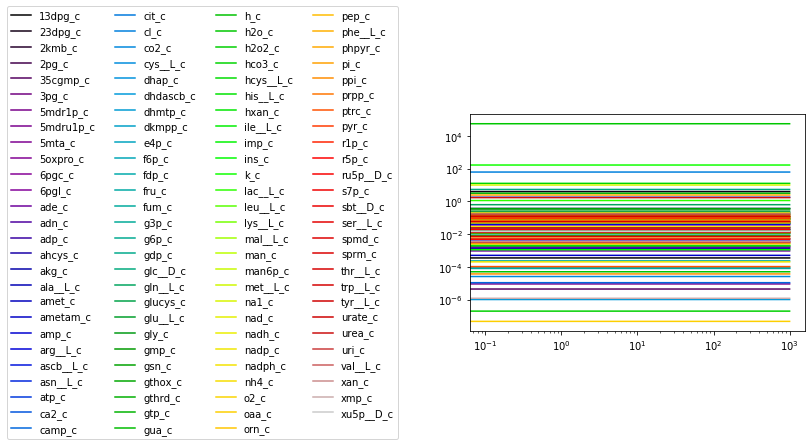

In [13]:
sim = Simulation(BASE_model, verbose=True)
conc_sol_list, flux_sol_list = sim.simulate(models=BASE_model, time=(0, 1000, 10001),
                                            verbose=True)
conc_sol, flux_sol  = conc_sol_list[0], flux_sol_list[0]
plot_time_profile(conc_sol, plot_function="loglog", legend='left outside')

In [14]:
filepath = path.realpath(path.join("models", BASE_model.id))
json.save_json_model(mass_model=BASE_model, filename=filepath + ".json")
sbml.write_sbml_model(mass_model=BASE_model, filename=filepath + ".xml")